### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns
application_df = application_df.drop(['EIN','NAME','AFFILIATION','USE_CASE','ORGANIZATION','STATUS','SPECIAL_CONSIDERATIONS'],1)
application_df

APPLICATION_TYPE CLASSIFICATION     INCOME_AMT   ASK_AMT  IS_SUCCESSFUL
0                  T10          C1000              0      5000              1
1                   T3          C2000         1-9999    108590              1
2                   T5          C3000              0      5000              0
3                   T3          C2000    10000-24999      6692              1
4                   T3          C1000  100000-499999    142590              1
...                ...            ...            ...       ...            ...
34294               T4          C1000              0      5000              0
34295               T4          C3000              0      5000              0
34296               T3          C2000              0      5000              0
34297               T5          C3000              0      5000              1
34298               T3          C1000          1M-5M  36500179              0

[34299 rows x 5 columns]

In [3]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE', 'CLASSIFICATION', 'INCOME_AMT']

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df.APPLICATION_TYPE.value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

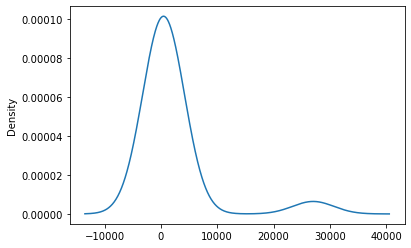

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type[application_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_type = application_df.CLASSIFICATION.value_counts()
class_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C6100        1
C1728        1
C2150        1
C1370        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

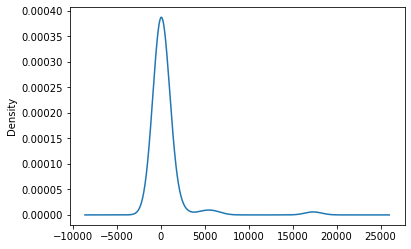

In [8]:
# Visualize the value counts of CLASSIFICATION
class_type.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_type[class_type < 1200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   CLASSIFICATION_C1000  ...  CLASSIFICATION_Other  INCOME_AMT_0  \
0                   1.0  ...                   0.0           1.0   
1                   0.0  ...                   0.0           0.0   
2                   0.0  ...                   0.0           1.0   
3                   0.0  ...                   0.0           0.0   
4                   1.0  ...                   0.0           0.0   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  
0              0.0                0.0  
1              0.0                0.0  
2              0.0                0.0  
3              0.0                0.0  
4              0.0                0.0  

[5 rows x 24 columns]

In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0     5000              1                     0.0                   1.0   
1   108590              1                     0.0                   0.0   
2     5000              0                     0.0                   0.0   
3     6692              1                     0.0                   0.0   
4   142590              1                     0.0                   0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  1.0                  0.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   CLASSIFICATION_Other  INCOME_AMT_0  INCOME_AMT_1-9999  \
0                   0.0           1.0                0.0   
1                   0.0           0.0                1.0   
2                   0.0           1.0                0.0   
3                   0.0           0.0                0.0   
4                   0.0           0.0                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 26 columns]

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Optimization Attempt 1: Noise Reduction

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  30
hidden_nodes_layer2 = 10

nn_opt1 = tf.keras.models.Sequential()

# First hidden layer
nn_opt1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_opt1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_opt1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_opt1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                780       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn_opt1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [20]:
# Train the model
fit_model = nn_opt1.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:57 - loss: 1.0880 - accuracy: 0.4375
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 31/804 [>.............................] - ETA: 1s - loss: 0.8345 - accuracy: 0.5212  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 0.7676 - accuracy: 0.5241
Epoch 00001: saving model to checkp


Epoch 00001: saving model to checkpoints/weights.01.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.6598 - accuracy: 0.6029
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.6592 - accuracy: 0.6026
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6587 - accuracy: 0.6035
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.6365 - accuracy: 0.6307
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.6362 - accuracy: 0.6309
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.6357 - accuracy: 


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.6368 - accuracy: 0.6399
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 48/804 [>.............................] - ETA: 1s - loss: 0.6343 - accuracy: 0.6178
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 73/804 [=>............................] - ETA: 1s - loss: 0.6314 - accuracy: 

553/804 [===================>..........] - ETA: 0s - loss: 0.6358 - accuracy: 0.6244
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6358 - accuracy: 0.6242
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6353 - accuracy: 0.6248
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03


Epoch 00004: saving model to checkpoints/weights.04.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.6381 - accuracy: 0.6244
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.6371 - accuracy: 0.6255
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.6380 - accuracy: 0.6238
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04

 25/804 [..............................] - ETA: 1s - loss: 0.6344 - accuracy: 0.6187
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 0.6390 - accuracy: 0.6200
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 75/804 [=>............................] - ETA: 1s - loss: 0.6361 - accuracy: 0.6204
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05


Epoch 00005: saving model to checkpoints/weights.05.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.6354 - accuracy: 0.6217
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6356 - accuracy: 0.6210
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6358 - accuracy: 0.6211
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.6345 - accuracy: 0.6243
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6343 - accuracy: 0.6243
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.6354 - accuracy: 

 19/804 [..............................] - ETA: 2s - loss: 0.6262 - accuracy: 0.6414
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 42/804 [>.............................] - ETA: 1s - loss: 0.6425 - accuracy: 0.6146
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 67/804 [=>............................] - ETA: 1s - loss: 0.6354 - accuracy: 0.6143
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07

562/804 [===================>..........] - ETA: 0s - loss: 0.6334 - accuracy: 0.6264
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6339 - accuracy: 0.6259
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6332 - accuracy: 0.6270
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.6333 - accuracy: 0.6302
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.6340 - accuracy: 0.6289
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.6334 - accuracy: 0.6284
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 49/804 [>.............................] - ETA: 1s - loss: 0.6247 - accuracy: 0.6327
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 74/804 [=>............................] - ETA: 1s - loss: 0.6254 - accuracy: 0.6334
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 99/804 [==>........


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6350 - accuracy: 0.6250
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6353 - accuracy: 0.6251
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
649/804 [===========


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.6342 - accuracy: 0.6256
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.6356 - accuracy: 0.6228
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
375/804 [============>.................] - ETA: 0s - loss: 0.6358 - accuracy: 0.6221
Epoch 00010: saving model to checkpoints/weights.10


Epoch 00011: saving model to checkpoints/weights.11.hdf5
 51/804 [>.............................] - ETA: 1s - loss: 0.6362 - accuracy: 0.6121
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 75/804 [=>............................] - ETA: 1s - loss: 0.6381 - accuracy: 0.6008
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 96/804 [==>...........................] - ETA: 1s - loss: 0.6377 - accuracy: 0.6061
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11

595/804 [=====================>........] - ETA: 0s - loss: 0.6328 - accuracy: 0.6265
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6328 - accuracy: 0.6258
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6324 - accuracy: 0.6270
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11

322/804 [===========>..................] - ETA: 1s - loss: 0.6357 - accuracy: 0.6269
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
347/804 [===========>..................] - ETA: 0s - loss: 0.6352 - accuracy: 0.6275
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
372/804 [============>.................] - ETA: 0s - loss: 0.6357 - accuracy: 0.6266
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 73/804 [=>............................] - ETA: 1s - loss: 0.6316 - accuracy: 0.6323
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.6346 - accuracy: 0.6272
Epoch 00013: saving model to checkpoints/weights.13.hdf5
103/804 [==>...........................] - ETA: 1s - loss: 0.6358 - accuracy: 0.6271
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13

607/804 [=====================>........] - ETA: 0s - loss: 0.6344 - accuracy: 0.6258
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.6344 - accuracy: 0.6254
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6345 - accuracy: 0.6252
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13

349/804 [============>.................] - ETA: 0s - loss: 0.6305 - accuracy: 0.6269
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
374/804 [============>.................] - ETA: 0s - loss: 0.6317 - accuracy: 0.6271
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.6313 - accuracy: 0.6270
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
105/804 [==>...........................] - ETA: 1s - loss: 0.6341 - accuracy: 0.6304
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6297
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving

640/804 [======================>.......] - ETA: 0s - loss: 0.6329 - accuracy: 0.6247
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6328 - accuracy: 0.6253
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6331 - accuracy: 0.6253
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15

376/804 [=============>................] - ETA: 0s - loss: 0.6339 - accuracy: 0.6262
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
401/804 [=============>................] - ETA: 0s - loss: 0.6345 - accuracy: 0.6255
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
426/804 [==============>...............] - ETA: 0s - loss: 0.6345 - accuracy: 0.6254
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
122/804 [===>..........................] - ETA: 1s - loss: 0.6345 - accuracy: 0.6260
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 0.6329 - accuracy: 0.6267
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.6323 - accuracy: 0.6277
Epoch 00017: saving model to checkpoints/weights.17


Epoch 00017: saving model to checkpoints/weights.17.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6326 - accuracy: 0.6259
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6329 - accuracy: 0.6255
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6329 - accuracy: 0.6251
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17

405/804 [==============>...............] - ETA: 0s - loss: 0.6334 - accuracy: 0.6289
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
428/804 [==============>...............] - ETA: 0s - loss: 0.6334 - accuracy: 0.6289
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.6324 - accuracy: 0.6300
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6341 - accuracy: 0.6167
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 0.6354 - accuracy: 0.6177
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6348 - accuracy: 0.6217
Epoch 00019: saving model to checkpoints/weights.19


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6328 - accuracy: 0.6265
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6329 - accuracy: 0.6265
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
759/804 [===========

424/804 [==============>...............] - ETA: 0s - loss: 0.6347 - accuracy: 0.6309
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.6348 - accuracy: 0.6287
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.6341 - accuracy: 0.6298
Epoch 00020: saving model to checkpoints/weights.20

151/804 [====>.........................] - ETA: 1s - loss: 0.6251 - accuracy: 0.6304
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 0.6271 - accuracy: 0.6305
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.6243 - accuracy: 0.6348
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21


Epoch 00021: saving model to checkpoints/weights.21.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6336 - accuracy: 0.6247
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6334 - accuracy: 0.6257
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6329 - accuracy: 0.6262
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.6300 - accuracy: 0.6314
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 0.6311 - accuracy: 0.6300
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
477/804 [===========


Epoch 00023: saving model to checkpoints/weights.23.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 0.6347 - accuracy: 0.6277
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 0.6339 - accuracy: 0.6286
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6343 - accuracy: 0.6269
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23


Epoch 00023: saving model to checkpoints/weights.23.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6354 - accuracy: 0.6240
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6353 - accuracy: 0.6242
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6350 - accuracy: 0.6244
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
444/804 [===============>..............] - ETA: 0s - loss: 0.6325 - accuracy: 0.6286
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.6337 - accuracy: 0.6275
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
494/804 [===========


Epoch 00025: saving model to checkpoints/weights.25.hdf5
163/804 [=====>........................] - ETA: 1s - loss: 0.6326 - accuracy: 0.6306
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 0.6329 - accuracy: 0.6292
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
210/804 [======>.......................] - ETA: 1s - loss: 0.6362 - accuracy: 0.6275
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6338 - accuracy: 0.6255
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6333 - accuracy: 0.6257
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
765/804 [===========


Epoch 00026: saving model to checkpoints/weights.26.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.6340 - accuracy: 0.6252
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.6346 - accuracy: 0.6245
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.6347 - accuracy: 0.6246
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26


Epoch 00027: saving model to checkpoints/weights.27.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.6326 - accuracy: 0.6310
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.6327 - accuracy: 0.6318
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6348 - accuracy: 0.6301
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27

705/804 [=========================>....] - ETA: 0s - loss: 0.6338 - accuracy: 0.6285
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6337 - accuracy: 0.6284
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6334 - accuracy: 0.6280
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27

427/804 [==============>...............] - ETA: 0s - loss: 0.6377 - accuracy: 0.6206
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.6369 - accuracy: 0.6214
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.6364 - accuracy: 0.6228
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28

144/804 [====>.........................] - ETA: 1s - loss: 0.6261 - accuracy: 0.6372
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.6301 - accuracy: 0.6334
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 0.6306 - accuracy: 0.6319
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29

689/804 [========================>.....] - ETA: 0s - loss: 0.6324 - accuracy: 0.6287
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6328 - accuracy: 0.6280
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6328 - accuracy: 0.6280
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 0.6348 - accuracy: 0.6245
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.6350 - accuracy: 0.6255
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.6343 - accuracy: 


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 0.6338 - accuracy: 0.6172
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.6352 - accuracy: 0.6130
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 0.6358 - accuracy: 


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6327 - accuracy: 0.6241
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6326 - accuracy: 0.6245
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6325 - accuracy: 


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
462/804 [================>.............] - ETA: 0s - loss: 0.6301 - accuracy: 0.6292
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.6303 - accuracy: 0.6296
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 0.6305 - accuracy: 


Epoch 00033: saving model to checkpoints/weights.33.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 0.6335 - accuracy: 0.6290
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
213/804 [======>.......................] - ETA: 1s - loss: 0.6334 - accuracy: 0.6293
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.6324 - accuracy: 0.6303
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33

735/804 [==========================>...] - ETA: 0s - loss: 0.6321 - accuracy: 0.6262
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6319 - accuracy: 0.6271
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6327 - accuracy: 0.6269
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33

469/804 [================>.............] - ETA: 0s - loss: 0.6310 - accuracy: 0.6279
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.6313 - accuracy: 0.6278
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6314 - accuracy: 0.6280
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34

190/804 [======>.......................] - ETA: 1s - loss: 0.6310 - accuracy: 0.6250
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.6321 - accuracy: 0.6250
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.6336 - accuracy: 0.6255
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6326 - accuracy: 0.6265
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6329 - accuracy: 0.6269
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.6266
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.6312 - accuracy: 0.6266
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.6299 - accuracy: 0.6285
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.6295 - accuracy: 0.6280
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.6351 - accuracy: 0.6240
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6329 - accuracy: 0.6249
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 0.6319 - accuracy: 0.6253
Epoch 00037: saving model to checkpoints/weights.37


Epoch 00037: saving model to checkpoints/weights.37.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6323 - accuracy: 0.6276
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6327 - accuracy: 0.6268
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6328 - accuracy: 0.6267
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37

438/804 [===============>..............] - ETA: 0s - loss: 0.6300 - accuracy: 0.6291
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
465/804 [================>.............] - ETA: 0s - loss: 0.6295 - accuracy: 0.6302
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.6303 - accuracy: 0.6294
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38

164/804 [=====>........................] - ETA: 1s - loss: 0.6218 - accuracy: 0.6399
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 0.6241 - accuracy: 0.6363
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.6244 - accuracy: 0.6358
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39


Epoch 00039: saving model to checkpoints/weights.39.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6323 - accuracy: 0.6275
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6322 - accuracy: 0.6276
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6330 - accuracy: 0.6271
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39

435/804 [===============>..............] - ETA: 0s - loss: 0.6338 - accuracy: 0.6222
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.6331 - accuracy: 0.6240
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.6327 - accuracy: 0.6248
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40

146/804 [====>.........................] - ETA: 1s - loss: 0.6313 - accuracy: 0.6406
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 0.6301 - accuracy: 0.6431
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 0.6305 - accuracy: 0.6405
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41

681/804 [========================>.....] - ETA: 0s - loss: 0.6323 - accuracy: 0.6287
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6324 - accuracy: 0.6288
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6325 - accuracy: 0.6287
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6323 - accuracy: 0.6292
Epoch 00041: saving model


Epoch 00042: saving model to checkpoints/weights.42.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.6341 - accuracy: 0.6228
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.6338 - accuracy: 0.6248
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.6332 - accuracy: 0.6259
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42


Epoch 00043: saving model to checkpoints/weights.43.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 0.6238 - accuracy: 0.6319
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6242 - accuracy: 0.6341
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.6255 - accuracy: 0.6323
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43

645/804 [=======================>......] - ETA: 0s - loss: 0.6335 - accuracy: 0.6237
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6334 - accuracy: 0.6239
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6335 - accuracy: 0.6237
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43

374/804 [============>.................] - ETA: 0s - loss: 0.6344 - accuracy: 0.6256
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
394/804 [=============>................] - ETA: 0s - loss: 0.6335 - accuracy: 0.6267
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.6338 - accuracy: 0.6262
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 0.6362 - accuracy: 0.6307
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6309 - accuracy: 0.6330
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
165/804 [=====>.....


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6317 - accuracy: 0.6296
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6317 - accuracy: 0.6292
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6316 - accuracy: 


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6329 - accuracy: 0.6277
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
411/804 [==============>...............] - ETA: 0s - loss: 0.6319 - accuracy: 0.6286
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving

 97/804 [==>...........................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6237
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6339 - accuracy: 0.6271
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.6337 - accuracy: 0.6308
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6298 - accuracy: 0.6306
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6300 - accuracy: 0.6300
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6302 - accuracy: 0.6295
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.6318 - accuracy: 0.6261
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
403/804 [==============>...............] - ETA: 0s - loss: 0.6326 - accuracy: 0.6259
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.6331 - accuracy: 

 81/804 [==>...........................] - ETA: 1s - loss: 0.6286 - accuracy: 0.6231
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.6255 - accuracy: 0.6247
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.6266 - accuracy: 0.6290
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
131/804 [===>..........................] - ETA: 1s - loss: 0.6287 - accuracy: 0.6283
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model

599/804 [=====================>........] - ETA: 0s - loss: 0.6317 - accuracy: 0.6277
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6315 - accuracy: 0.6272
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6315 - accuracy: 0.6278
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49


Epoch 00050: saving model to checkpoints/weights.50.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.6353 - accuracy: 0.6278
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6352 - accuracy: 0.6278
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.6351 - accuracy: 0.6281
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 76/804 [=>............................] - ETA: 1s - loss: 0.6371 - accuracy: 0.6192
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.6373 - accuracy: 0.6219
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
126/804 [===>.......


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6302 - accuracy: 0.6294
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6308 - accuracy: 0.6288
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6312 - accuracy: 


Epoch 00052: saving model to checkpoints/weights.52.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.6341 - accuracy: 0.6251
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
372/804 [============>.................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6243
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.6354 - accuracy: 0.6226
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 92/804 [==>...........................] - ETA: 1s - loss: 0.6389 - accuracy: 0.6185
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 0.6406 - accuracy: 0.6170
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6360 - accuracy: 0.6264
Epoch 00053: saving model to checkpoints/weights.53


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.6314 - accuracy: 0.6284
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6316 - accuracy: 0.6287
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6315 - accuracy: 0.6281
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53

345/804 [===========>..................] - ETA: 1s - loss: 0.6314 - accuracy: 0.6253
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
374/804 [============>.................] - ETA: 0s - loss: 0.6314 - accuracy: 0.6247
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.6304 - accuracy: 0.6260
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54

 70/804 [=>............................] - ETA: 1s - loss: 0.6273 - accuracy: 0.6451
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 95/804 [==>...........................] - ETA: 1s - loss: 0.6238 - accuracy: 0.6441
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.6250 - accuracy: 0.6383
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6317 - accuracy: 0.6257
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6321 - accuracy: 0.6262
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6329 - accuracy: 0.6257
Epoch 00055: saving model to checkpoints/weights.55


Epoch 00056: saving model to checkpoints/weights.56.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.6347 - accuracy: 0.6245
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6343 - accuracy: 0.6266
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
382/804 [=============>................] - ETA: 0s - loss: 0.6335 - accuracy: 0.6271
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 72/804 [=>............................] - ETA: 1s - loss: 0.6172 - accuracy: 0.6441
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.6184 - accuracy: 0.6455
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.6185 - accuracy: 0.6388
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.6208 - accuracy: 0.6392
Epoch 00057: saving model

609/804 [=====================>........] - ETA: 0s - loss: 0.6330 - accuracy: 0.6235
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6331 - accuracy: 0.6239
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6329 - accuracy: 0.6242
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57


Epoch 00058: saving model to checkpoints/weights.58.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.6312 - accuracy: 0.6246
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.6310 - accuracy: 0.6243
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.6323 - accuracy: 0.6224
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58

 49/804 [>.............................] - ETA: 1s - loss: 0.6298 - accuracy: 0.6435
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 70/804 [=>............................] - ETA: 1s - loss: 0.6292 - accuracy: 0.6366
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 89/804 [==>...........................] - ETA: 1s - loss: 0.6268 - accuracy: 0.6412
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
109/804 [===>..........................] - ETA: 1s -


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.6317 - accuracy: 0.6274
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6322 - accuracy: 0.6274
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6323 - accuracy: 


Epoch 00060: saving model to checkpoints/weights.60.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.6360 - accuracy: 0.6173
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.6363 - accuracy: 0.6159
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.6360 - accuracy: 0.6157
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60

 49/804 [>.............................] - ETA: 1s - loss: 0.6306 - accuracy: 0.6269
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 71/804 [=>............................] - ETA: 1s - loss: 0.6325 - accuracy: 0.6263
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 96/804 [==>...........................] - ETA: 1s - loss: 0.6307 - accuracy: 0.6279
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.6299 - accuracy: 0.6264
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6306 - accuracy: 0.6260
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6310 - accuracy: 0.6261
Epoch 00061: saving model to checkpoints/weights.61

312/804 [==========>...................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6295
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.6325 - accuracy: 0.6284
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6318 - accuracy: 0.6283
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 43/804 [>.............................] - ETA: 1s - loss: 0.6272 - accuracy: 0.6323
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 0.6349 - accuracy: 0.6204
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 93/804 [==>...........................] - ETA: 1s - loss: 0.6313 - accuracy: 0.6280
Epoch 00063: saving model to checkpoints/weights.63

573/804 [====================>.........] - ETA: 0s - loss: 0.6299 - accuracy: 0.6295
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.6311 - accuracy: 0.6284
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.6313 - accuracy: 0.6280
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.6332 - accuracy: 0.6249
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6330 - accuracy: 0.6255
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.6339 - accuracy: 0.6240
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64

 25/804 [..............................] - ETA: 1s - loss: 0.6034 - accuracy: 0.6662
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 0.6256 - accuracy: 0.6419
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 70/804 [=>............................] - ETA: 1s - loss: 0.6327 - accuracy: 0.6379
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 85/804 [==>...........................] - ETA: 1s -


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6326 - accuracy: 0.6285
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6324 - accuracy: 0.6285
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6325 - accuracy: 0.6283
Epoch 00065: saving model to checkpoints/weights.65


Epoch 00066: saving model to checkpoints/weights.66.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6369 - accuracy: 0.6226
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.6362 - accuracy: 0.6232
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.6364 - accuracy: 0.6235
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 0.6323 - accuracy: 0.6263
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 73/804 [=>............................] - ETA: 1s - loss: 0.6293 - accuracy: 0.6293
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.6329 - accuracy: 


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6320 - accuracy: 0.6267
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6319 - accuracy: 0.6264
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.6326 - accuracy: 0.6261
Epoch 00067: saving model to checkpoints/weights.67

308/804 [==========>...................] - ETA: 1s - loss: 0.6305 - accuracy: 0.6284
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.6307 - accuracy: 0.6265
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6296 - accuracy: 0.6281
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 48/804 [>.............................] - ETA: 1s - loss: 0.6335 - accuracy: 0.6289
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 69/804 [=>............................] - ETA: 1s - loss: 0.6294 - accuracy: 0.6363
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 93/804 [==>...........................] - ETA: 1s - loss: 0.6308 - accuracy: 0.6307
Epoch 00069: saving model to checkpoints/weights.69

561/804 [===================>..........] - ETA: 0s - loss: 0.6325 - accuracy: 0.6248
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6329 - accuracy: 0.6245
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6328 - accuracy: 0.6246
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
619/804 [======================>.......] - ETA: 0s -

279/804 [=========>....................] - ETA: 1s - loss: 0.6313 - accuracy: 0.6290
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.6325 - accuracy: 0.6281
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6334 - accuracy: 0.6269
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70


Epoch 00070: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6326 - accuracy: 0.6268
Epoch 71/100
  1/804 [..............................] - ETA: 1s - loss: 0.6662 - accuracy: 0.5938
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 26/804 [..............................] - ETA: 1s - loss: 0.6257 - accuracy: 0.6370
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 51/804 [>.............................] - ETA: 1s - loss: 0.6306 - accuracy: 0.6250
Epoch 0

535/804 [==================>...........] - ETA: 0s - loss: 0.6313 - accuracy: 0.6287
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.6314 - accuracy: 0.6292
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.6317 - accuracy: 0.6289
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71

257/804 [========>.....................] - ETA: 1s - loss: 0.6278 - accuracy: 0.6323
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.6280 - accuracy: 0.6313
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.6286 - accuracy: 0.6312
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
319/804 [==========>...................] - ETA: 1s -


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6326 - accuracy: 0.6262
Epoch 73/100
  1/804 [..............................] - ETA: 1s - loss: 0.6538 - accuracy: 0.6562
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.6582 - accuracy: 0.5870
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 48/804 [>........................


Epoch 00073: saving model to checkpoints/weights.73.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.6312 - accuracy: 0.6273
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.6315 - accuracy: 0.6271
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6314 - accuracy: 0.6273
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73


Epoch 00074: saving model to checkpoints/weights.74.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.6272 - accuracy: 0.6355
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.6276 - accuracy: 0.6339
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.6273 - accuracy: 0.6341
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74

799/804 [============================>.] - ETA: 0s - loss: 0.6322 - accuracy: 0.6291
Epoch 00074: saving model to checkpoints/weights.74.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6323 - accuracy: 0.6288
Epoch 75/100
  1/804 [..............................] - ETA: 1s - loss: 0.5665 - accuracy: 0.6875
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6106 - accuracy: 0.6425
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 50/804 

519/804 [==================>...........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6252
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6328 - accuracy: 0.6252
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.6322 - accuracy: 0.6267
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75


Epoch 00076: saving model to checkpoints/weights.76.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6299
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.6349 - accuracy: 0.6250
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6365 - accuracy: 0.6225
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76

762/804 [===========================>..] - ETA: 0s - loss: 0.6327 - accuracy: 0.6261
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6324 - accuracy: 0.6267
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6323 - accuracy: 0.6269
Epoch 77/100
  1/804 [..............................] - ETA: 1s - loss: 0.6251 - accuracy: 0.6562
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 0

470/804 [================>.............] - ETA: 0s - loss: 0.6331 - accuracy: 0.6251
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.6333 - accuracy: 0.6253
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.6317 - accuracy: 0.6271
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77


Epoch 00078: saving model to checkpoints/weights.78.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 0.6336 - accuracy: 0.6188
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.6326 - accuracy: 0.6196
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 0.6345 - accuracy: 0.6184
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6326 - accuracy: 0.6263
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6320 - accuracy: 0.6271
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6319 - accuracy: 

464/804 [================>.............] - ETA: 0s - loss: 0.6299 - accuracy: 0.6315
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.6310 - accuracy: 0.6303
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.6309 - accuracy: 0.6307
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79


Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.6316 - accuracy: 0.6288
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.6305 - accuracy: 0.6285
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
265/804 [========>..

739/804 [==========================>...] - ETA: 0s - loss: 0.6314 - accuracy: 0.6274
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6314 - accuracy: 0.6275
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6320 - accuracy: 0.6268
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.6305 - accuracy: 0.6296
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.6308 - accuracy: 0.6288
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.6303 - accuracy: 0.6292
Epoch 00081: saving model to checkpoints/weights.81


Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6305 - accuracy: 0.6282
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.6307 - accuracy: 0.6291
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.6320 - accuracy: 


Epoch 00082: saving model to checkpoints/weights.82.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6333 - accuracy: 0.6255
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6328 - accuracy: 0.6260
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6322 - accuracy: 0.6264
Epoch 83/100
  1/804 [..............................] - ETA: 0s - loss: 0.7159 - accuracy: 0.5312
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 0


Epoch 00083: saving model to checkpoints/weights.83.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.6333 - accuracy: 0.6223
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6223
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.6318 - accuracy: 0.6245
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.6301 - accuracy: 0.6275
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.6331 - accuracy: 0.6265
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.6325 - accuracy: 0.6266
Epoch 00084: saving model to checkpoints/weights.84

747/804 [==========================>...] - ETA: 0s - loss: 0.6320 - accuracy: 0.6275
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6322 - accuracy: 0.6276
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6322 - accuracy: 0.6276
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
804/804 [==============================] - 2s 2ms/st

456/804 [================>.............] - ETA: 0s - loss: 0.6321 - accuracy: 0.6273
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.6316 - accuracy: 0.6279
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.6313 - accuracy: 0.6277
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 0.6307 - accuracy: 0.6277
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.6307 - accuracy: 0.6267
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.6299 - accuracy: 0.6259
Epoch 00086: saving model to checkpoints/weights.86


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6325 - accuracy: 0.6272
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6322 - accuracy: 0.6272
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
796/804 [===========

457/804 [================>.............] - ETA: 0s - loss: 0.6304 - accuracy: 0.6291
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.6308 - accuracy: 0.6282
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.6301 - accuracy: 0.6290
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87

188/804 [======>.......................] - ETA: 1s - loss: 0.6291 - accuracy: 0.6310
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 0.6325 - accuracy: 0.6262
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.6322 - accuracy: 0.6262
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6317 - accuracy: 0.6284
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6317 - accuracy: 0.6286
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6320 - accuracy: 


Epoch 00089: saving model to checkpoints/weights.89.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.6324 - accuracy: 0.6282
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.6317 - accuracy: 0.6275
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6320 - accuracy: 0.6278
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89


Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.6306 - accuracy: 0.6298
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.6310 - accuracy: 0.6298
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.6304 - accuracy: 0.6294
Epoch 00090: saving model to checkpoints/weights.90

745/804 [==========================>...] - ETA: 0s - loss: 0.6324 - accuracy: 0.6275
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6320 - accuracy: 0.6274
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6323 - accuracy: 0.6271
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
804/804 [==============================] - 2s 2ms/st


Epoch 00091: saving model to checkpoints/weights.91.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.6311 - accuracy: 0.6256
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.6311 - accuracy: 0.6264
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.6310 - accuracy: 0.6271
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91

207/804 [======>.......................] - ETA: 1s - loss: 0.6264 - accuracy: 0.6319
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.6266 - accuracy: 0.6322
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.6269 - accuracy: 0.6319
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92


Epoch 00092: saving model to checkpoints/weights.92.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6322 - accuracy: 0.6275
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6324 - accuracy: 0.6275
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6321 - accuracy: 0.6274
Epoch 93/100
  1/804 [..............................] - ETA: 0s - loss: 0.6152 - accuracy: 0.5938
Epoch 0


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.6343 - accuracy: 0.6237
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6343 - accuracy: 0.6240
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6345 - accuracy: 0.6225
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93


Epoch 00094: saving model to checkpoints/weights.94.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.6281 - accuracy: 0.6347
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.6297 - accuracy: 0.6347
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.6286 - accuracy: 0.6353
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94

759/804 [===========================>..] - ETA: 0s - loss: 0.6329 - accuracy: 0.6267
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6328 - accuracy: 0.6269
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6321 - accuracy: 0.6276
Epoch 95/100
  1/804 [..............................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5312
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 0


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.6335 - accuracy: 0.6261
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.6336 - accuracy: 0.6257
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6336 - accuracy: 


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.6347 - accuracy: 0.6236
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 0.6356 - accuracy: 0.6219
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.6351 - accuracy: 


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6325 - accuracy: 0.6267
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6321 - accuracy: 0.6272
Epoch 97/100
  1/804 [..............................] - ETA: 1s - loss: 0.5609 - accuracy: 0.6562
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.6595 - accuracy: 0.6037
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 0


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.6369 - accuracy: 0.6221
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.6362 - accuracy: 0.6227
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.6357 - accuracy: 

242/804 [========>.....................] - ETA: 1s - loss: 0.6306 - accuracy: 0.6282
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.6334 - accuracy: 0.6255
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.6347 - accuracy: 0.6247
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6323 - accuracy: 0.6265
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6321 - accuracy: 0.6266
Epoch 99/100
  1/804 [..............................] - ETA: 1s - loss: 0.6429 - accuracy: 0.6250
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 24/804 [..............................] - ETA: 1s - loss: 0.6447 - accuracy: 0.6276
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 0

513/804 [==================>...........] - ETA: 0s - loss: 0.6320 - accuracy: 0.6277
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.6318 - accuracy: 0.6282
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6319 - accuracy: 0.6273
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99


Epoch 00100: saving model to checkpoints/weights.100.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.6303 - accuracy: 0.6235
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.6319 - accuracy: 0.6217
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.6330 - accuracy: 0.6212
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoint


Epoch 00100: saving model to checkpoints/weights.100.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6315 - accuracy: 0.6279
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6315 - accuracy: 0.6280
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6322 - accuracy: 0.6274


In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6405 - accuracy: 0.6244
Loss: 0.6404600143432617, Accuracy: 0.624373197555542


### Optimization Attempt 2: Noise Reduction + Additional Nodes

In [30]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  300
hidden_nodes_layer2 = 100

nn_opt2 = tf.keras.models.Sequential()

# First hidden layer
nn_opt2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_opt2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_opt2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

In [32]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)
#no changes here, but since checkpoint_path changed need to run this again

In [33]:
# Train the model
fit_model = nn_opt2.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:48 - loss: 0.7251 - accuracy: 0.5000
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 24/804 [..............................] - ETA: 1s - loss: 0.6816 - accuracy: 0.5664  
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.6626 - accuracy: 0.5971
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving mod


Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.6459 - accuracy: 0.6165
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.6453 - accuracy: 0.6168
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.6450 - accuracy: 0.6181
Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5

Epoch 00001: saving model to checkpoints2/weights.01.hdf5
557/804 [===================>..........]

187/804 [=====>........................] - ETA: 1s - loss: 0.6363 - accuracy: 0.6230
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.6373 - accuracy: 0.6220
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.6363 - accuracy: 0.6208
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6387 - accuracy: 0.6167
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.6377 - accura

648/804 [=======================>......] - ETA: 0s - loss: 0.6378 - accuracy: 0.6198
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6387 - accuracy: 0.6191
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6389 - accuracy: 0.6190
Epoch 00002: saving model to checkpoints2/weights.02.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6391 - accuracy: 0.6190
Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5

Epoch 00002: saving model to checkpoints2/weights.02.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6389 - accura


Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.6338 - accuracy: 0.6283
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6339 - accuracy: 0.6277
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoints2/weights.03.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.6337 - accuracy: 0.6284
Epoch 00003: saving model to checkpoints2/weights.03.hdf5

Epoch 00003: saving model to checkpoint


Epoch 00004: saving model to checkpoints2/weights.04.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6388 - accuracy: 0.6234
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6366 - accuracy: 0.6314
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6366 - accuracy: 0.6224
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoint


Epoch 00004: saving model to checkpoints2/weights.04.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.6366 - accuracy: 0.6203
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6363 - accuracy: 0.6214
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.6358 - accuracy: 0.6218
Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5

Epoch 00004: saving model to checkpoints2/weights.04.hdf5
579/804 [====================>.........]


Epoch 00005: saving model to checkpoints2/weights.05.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.6420 - accuracy: 0.6215
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6426 - accuracy: 0.6209
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.6410 - accuracy: 0.6232
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.6413 - accuracy: 0.6224
Epoch 00005: s

705/804 [=========================>....] - ETA: 0s - loss: 0.6365 - accuracy: 0.6251
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6364 - accuracy: 0.6250
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6366 - accuracy: 0.6247
Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5

Epoch 00005: saving model to checkpoints2/weights.05.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6367 - accuracy: 0.6245
Epoch 00005: s


Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.6367 - accuracy: 0.6225
Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.6367 - accuracy: 0.6232
Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6369 - accuracy: 0.6234
Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoints2/weights.06.hdf5

Epoch 00006: saving model to checkpoint


Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.6384 - accuracy: 0.6212
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.6353 - accuracy: 0.6265
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
126/804 [===>..........................] - ETA: 1s - loss: 0.6355 - accuracy: 0.6260
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoint

592/804 [=====================>........] - ETA: 0s - loss: 0.6353 - accuracy: 0.6257
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6353 - accuracy: 0.6257
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6356 - accuracy: 0.6251
Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5

Epoch 00007: saving model to checkpoints2/weights.07.hdf5
652/804 [=======================>......]


Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6374 - accuracy: 0.6235
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.6378 - accuracy: 0.6243
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.6381 - accuracy: 0.6229
Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoint


Epoch 00008: saving model to checkpoints2/weights.08.hdf5

Epoch 00008: saving model to checkpoints2/weights.08.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6355 - accuracy: 0.6270
Epoch 00008: saving model to checkpoints2/weights.08.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6355 - accuracy: 0.6267
Epoch 9/100
  1/804 [..............................] - ETA: 1s - loss: 0.5967 - accuracy: 0.6562
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6122 - accuracy: 0.6546
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
 35/804 [>.............................] - ETA: 2s - loss

479/804 [================>.............] - ETA: 0s - loss: 0.6326 - accuracy: 0.6275
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.6326 - accuracy: 0.6275
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6266
Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5

Epoch 00009: saving model to checkpoints2/weights.09.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.6335 - accuracy: 0.6261
Epoch 00009: s


Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6305
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.6319 - accuracy: 0.6319
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.6318 - accuracy: 0.6324
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoint

675/804 [========================>.....] - ETA: 0s - loss: 0.6333 - accuracy: 0.6295
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6328 - accuracy: 0.6304
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6334 - accuracy: 0.6294
Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5

Epoch 00010: saving model to checkpoints2/weights.10.hdf5
735/804 [==========================>...]


Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6362 - accuracy: 0.6261
Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6352 - accuracy: 0.6275
Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.6358 - accuracy: 0.6271
Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoints2/weights.11.hdf5

Epoch 00011: saving model to checkpoint


Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 0.6370 - accuracy: 0.6232
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 0.6334 - accuracy: 0.6292
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.6369 - accuracy: 0.6254
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
102/804 [==>...........................]


Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6348 - accuracy: 0.6274
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.6358 - accuracy: 0.6260
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6353 - accuracy: 0.6267
Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoints2/weights.12.hdf5

Epoch 00012: saving model to checkpoint


Epoch 00013: saving model to checkpoints2/weights.13.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.6307 - accuracy: 0.6281
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.6297 - accuracy: 0.6296
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.6304 - accuracy: 0.6300
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6319 - accuracy: 0.6299
Epoch 00013: s

738/804 [==========================>...] - ETA: 0s - loss: 0.6354 - accuracy: 0.6256
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6349 - accuracy: 0.6271
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6348 - accuracy: 0.6268
Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5

Epoch 00013: saving model to checkpoints2/weights.13.hdf5
798/804 [============================>.]


Epoch 00014: saving model to checkpoints2/weights.14.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6346 - accuracy: 0.6280
Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6350 - accuracy: 0.6262
Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6352 - accuracy: 0.6257
Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoints2/weights.14.hdf5

Epoch 00014: saving model to checkpoint

110/804 [===>..........................] - ETA: 2s - loss: 0.6250 - accuracy: 0.6398
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
129/804 [===>..........................] - ETA: 1s - loss: 0.6263 - accuracy: 0.6395
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.6267 - accuracy: 0.6369
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.6264 - accuracy: 0.6354
Epoch 00015: s

601/804 [=====================>........] - ETA: 0s - loss: 0.6334 - accuracy: 0.6272
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6338 - accuracy: 0.6273
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6337 - accuracy: 0.6270
Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5

Epoch 00015: saving model to checkpoints2/weights.15.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6341 - accuracy: 0.6270
Epoch 00015: s


Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.6355 - accuracy: 0.6228
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.6346 - accuracy: 0.6231
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.6345 - accuracy: 0.6236
Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoints2/weights.16.hdf5

Epoch 00016: saving model to checkpoint

804/804 [==============================] - 2s 3ms/step - loss: 0.6341 - accuracy: 0.6242
Epoch 17/100
  1/804 [..............................] - ETA: 1s - loss: 0.6155 - accuracy: 0.5312
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6164 - accuracy: 0.6398
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6208 - accuracy: 0.6343
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hd

497/804 [=================>............] - ETA: 0s - loss: 0.6355 - accuracy: 0.6239
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.6351 - accuracy: 0.6254
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.6351 - accuracy: 0.6256
Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5

Epoch 00017: saving model to checkpoints2/weights.17.hdf5
557/804 [===================>..........]

193/804 [======>.......................] - ETA: 1s - loss: 0.6344 - accuracy: 0.6201
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.6354 - accuracy: 0.6190
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.6359 - accuracy: 0.6195
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.6341 - accuracy: 0.6222
Epoch 00018: s


Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6353 - accuracy: 0.6258
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6350 - accuracy: 0.6257
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6345 - accuracy: 0.6264
Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoints2/weights.18.hdf5

Epoch 00018: saving model to checkpoint

356/804 [============>.................] - ETA: 1s - loss: 0.6345 - accuracy: 0.6282
Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6342 - accuracy: 0.6284
Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.6348 - accuracy: 0.6279
Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.6352 - accuracy: 0.6278
Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: saving model to checkpoints2/weights.19.hdf5

Epoch 00019: s

 40/804 [>.............................] - ETA: 2s - loss: 0.6394 - accuracy: 0.6250
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6459 - accuracy: 0.6109
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.6417 - accuracy: 0.6199
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
100/804 [==>...........................]


Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6341 - accuracy: 0.6257
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6343 - accuracy: 0.6256
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoints2/weights.20.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6341 - accuracy: 0.6248
Epoch 00020: saving model to checkpoints2/weights.20.hdf5

Epoch 00020: saving model to checkpoint

241/804 [=======>......................] - ETA: 1s - loss: 0.6333 - accuracy: 0.6271
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.6322 - accuracy: 0.6291
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.6319 - accuracy: 0.6288
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
301/804 [==========>...................]


Epoch 00021: saving model to checkpoints2/weights.21.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6333 - accuracy: 0.6273
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6336 - accuracy: 0.6269
Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5

Epoch 00021: saving model to checkpoints2/weights.21.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6337 - accuracy: 0.6263
Epoch 00021: saving model to checkpoints2/weights.21.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6336 - accuracy: 0.6264
Epoch 22/100
  1/804 [..............................] - ETA: 1s - los

450/804 [===============>..............] - ETA: 0s - loss: 0.6317 - accuracy: 0.6272
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
467/804 [================>.............] - ETA: 0s - loss: 0.6325 - accuracy: 0.6262
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.6322 - accuracy: 0.6276
Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5

Epoch 00022: saving model to checkpoints2/weights.22.hdf5
507/804 [=================>............]

123/804 [===>..........................] - ETA: 2s - loss: 0.6330 - accuracy: 0.6321
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.6324 - accuracy: 0.6296
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.6337 - accuracy: 0.6266
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.6347 - accuracy: 0.6285
Epoch 00023: s

618/804 [======================>.......] - ETA: 0s - loss: 0.6350 - accuracy: 0.6253
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6340 - accuracy: 0.6263
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6335 - accuracy: 0.6263
Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5

Epoch 00023: saving model to checkpoints2/weights.23.hdf5
678/804 [========================>.....]

309/804 [==========>...................] - ETA: 1s - loss: 0.6287 - accuracy: 0.6301
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6304 - accuracy: 0.6277
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.6307 - accuracy: 0.6281
Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5

Epoch 00024: saving model to checkpoints2/weights.24.hdf5
369/804 [============>.................]

  1/804 [..............................] - ETA: 1s - loss: 0.7166 - accuracy: 0.5312
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6234 - accuracy: 0.6359
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6162 - accuracy: 0.6508
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
 60/804 [=>............................]


Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.6332 - accuracy: 0.6255
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6329 - accuracy: 0.6263
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.6330 - accuracy: 0.6264
Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoints2/weights.25.hdf5

Epoch 00025: saving model to checkpoint


Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.6255 - accuracy: 0.6281
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.6268 - accuracy: 0.6268
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.6281 - accuracy: 0.6261
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoint

724/804 [==========================>...] - ETA: 0s - loss: 0.6322 - accuracy: 0.6276
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6326 - accuracy: 0.6272
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6330 - accuracy: 0.6269
Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5

Epoch 00026: saving model to checkpoints2/weights.26.hdf5
781/804 [============================>.]


Epoch 00027: saving model to checkpoints2/weights.27.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.6320 - accuracy: 0.6287
Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5
455/804 [===============>..............] - ETA: 0s - loss: 0.6321 - accuracy: 0.6284
Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.6320 - accuracy: 0.6287
Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoints2/weights.27.hdf5

Epoch 00027: saving model to checkpoint

148/804 [====>.........................] - ETA: 1s - loss: 0.6364 - accuracy: 0.6286
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 0.6342 - accuracy: 0.6267
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.6343 - accuracy: 0.6285
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 0.6342 - accuracy: 0.6285
Epoch 00028: s


Epoch 00028: saving model to checkpoints2/weights.28.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6329 - accuracy: 0.6270
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6333 - accuracy: 0.6269
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6331 - accuracy: 0.6265
Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5

Epoch 00028: saving model to checkpoints2/weights.28.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6333 - accuracy: 0.6259
Epoch 00028: s

337/804 [===========>..................] - ETA: 1s - loss: 0.6301 - accuracy: 0.6295
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6304 - accuracy: 0.6288
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.6305 - accuracy: 0.6282
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: saving model to checkpoints2/weights.29.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6302 - accuracy: 0.6280
Epoch 00029: saving model to checkpoints2/weights.29.hdf5

Epoch 00029: s

 20/804 [..............................] - ETA: 2s - loss: 0.6438 - accuracy: 0.5984
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6385 - accuracy: 0.6154
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.6376 - accuracy: 0.6182
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6380 - accuracy: 0.6122
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: s


Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.6333 - accuracy: 0.6266
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6336 - accuracy: 0.6267
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoints2/weights.30.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6336 - accuracy: 0.6262
Epoch 00030: saving model to checkpoints2/weights.30.hdf5

Epoch 00030: saving model to checkpoint

211/804 [======>.......................] - ETA: 1s - loss: 0.6273 - accuracy: 0.6334
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.6289 - accuracy: 0.6306
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.6308 - accuracy: 0.6275
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoint

725/804 [==========================>...] - ETA: 0s - loss: 0.6332 - accuracy: 0.6273
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6330 - accuracy: 0.6272
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6332 - accuracy: 0.6269
Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5

Epoch 00031: saving model to checkpoints2/weights.31.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6331 - accuracy: 0.6277
Epoch 00031: s


Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6303 - accuracy: 0.6311
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.6310 - accuracy: 0.6302
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6305 - accuracy: 0.6314
Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoints2/weights.32.hdf5

Epoch 00032: saving model to checkpoint


Epoch 00033: saving model to checkpoints2/weights.33.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.6282 - accuracy: 0.6306
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6285 - accuracy: 0.6300
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 0.6318 - accuracy: 0.6272
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
173/804 [=====>........................]


Epoch 00033: saving model to checkpoints2/weights.33.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.6328 - accuracy: 0.6287
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6329 - accuracy: 0.6284
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6327 - accuracy: 0.6283
Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5

Epoch 00033: saving model to checkpoints2/weights.33.hdf5
678/804 [========================>.....]


Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6329 - accuracy: 0.6274
Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6325 - accuracy: 0.6280
Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoints2/weights.34.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.6340 - accuracy: 0.6262
Epoch 00034: saving model to checkpoints2/weights.34.hdf5

Epoch 00034: saving model to checkpoint


Epoch 00034: saving model to checkpoints2/weights.34.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6331 - accuracy: 0.6271
Epoch 35/100
  1/804 [..............................] - ETA: 1s - loss: 0.6686 - accuracy: 0.6562
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6245 - accuracy: 0.6406
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.6317 - accuracy: 0.6384
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hd

490/804 [=================>............] - ETA: 0s - loss: 0.6341 - accuracy: 0.6256
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.6336 - accuracy: 0.6257
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6260
Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5

Epoch 00035: saving model to checkpoints2/weights.35.hdf5
550/804 [===================>..........]

194/804 [======>.......................] - ETA: 1s - loss: 0.6342 - accuracy: 0.6242
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 0.6330 - accuracy: 0.6266
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.6308 - accuracy: 0.6293
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
251/804 [========>.....................]


Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6331 - accuracy: 0.6282
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6332 - accuracy: 0.6285
Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5

Epoch 00036: saving model to checkpoints2/weights.36.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6331 - accuracy: 0.6284
Epoch 00036: saving model to checkpoints2/weights.36.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6332 - accuracy: 0.6281
Epoch 00036: s

387/804 [=============>................] - ETA: 1s - loss: 0.6307 - accuracy: 0.6270
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6318 - accuracy: 0.6258
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.6324 - accuracy: 0.6263
Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5

Epoch 00037: saving model to checkpoints2/weights.37.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.6328 - accuracy: 0.6255
Epoch 00037: s


Epoch 00038: saving model to checkpoints2/weights.38.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.6391 - accuracy: 0.6186
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.6371 - accuracy: 0.6181
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.6400 - accuracy: 0.6165
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoint

593/804 [=====================>........] - ETA: 0s - loss: 0.6333 - accuracy: 0.6251
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6344 - accuracy: 0.6241
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6338 - accuracy: 0.6253
Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5

Epoch 00038: saving model to checkpoints2/weights.38.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6337 - accuracy: 0.6252
Epoch 00038: s

279/804 [=========>....................] - ETA: 1s - loss: 0.6256 - accuracy: 0.6334
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6265 - accuracy: 0.6329
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.6279 - accuracy: 0.6314
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
339/804 [===========>..................]


Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.6259
Epoch 00039: saving model to checkpoints2/weights.39.hdf5

Epoch 00039: saving model to checkpoints2/weights.39.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6328 - accuracy: 0.6260
Epoch 40/100
  1/804 [..............................] - ETA: 2s - loss: 0.6405 - accuracy: 0.6250
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6365 - accuracy: 0.6172
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hd

475/804 [================>.............] - ETA: 0s - loss: 0.6344 - accuracy: 0.6239
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.6341 - accuracy: 0.6237
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.6343 - accuracy: 0.6236
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.6340 - accuracy: 0.6241
Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: saving model to checkpoints2/weights.40.hdf5

Epoch 00040: s


Epoch 00041: saving model to checkpoints2/weights.41.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.6311 - accuracy: 0.6320
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.6296 - accuracy: 0.6335
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 0.6324 - accuracy: 0.6285
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6317 - accuracy: 0.6264
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6325 - accuracy: 0.6254
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6327 - accuracy: 0.6256
Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoints2/weights.41.hdf5

Epoch 00041: saving model to checkpoint


Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6311 - accuracy: 0.6301
Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.6321 - accuracy: 0.6288
Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6325 - accuracy: 0.6283
Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoints2/weights.42.hdf5

Epoch 00042: saving model to checkpoint

 53/804 [>.............................] - ETA: 2s - loss: 0.6413 - accuracy: 0.6232
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6356 - accuracy: 0.6211
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.6360 - accuracy: 0.6233
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
113/804 [===>..........................]

558/804 [===================>..........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6256
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6330 - accuracy: 0.6254
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6251
Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5

Epoch 00043: saving model to checkpoints2/weights.43.hdf5
618/804 [======================>.......]

254/804 [========>.....................] - ETA: 1s - loss: 0.6284 - accuracy: 0.6351
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6278 - accuracy: 0.6361
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.6287 - accuracy: 0.6347
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6283 - accuracy: 0.6352
Epoch 00044: s

764/804 [===========================>..] - ETA: 0s - loss: 0.6327 - accuracy: 0.6273
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6333 - accuracy: 0.6265
Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5

Epoch 00044: saving model to checkpoints2/weights.44.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6328 - accuracy: 0.6268
Epoch 45/100
  1/804 [..............................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7500
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hd

471/804 [================>.............] - ETA: 0s - loss: 0.6339 - accuracy: 0.6247
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.6335 - accuracy: 0.6256
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.6335 - accuracy: 0.6259
Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5

Epoch 00045: saving model to checkpoints2/weights.45.hdf5
530/804 [==================>...........]

161/804 [=====>........................] - ETA: 1s - loss: 0.6378 - accuracy: 0.6207
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.6368 - accuracy: 0.6220
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 0.6338 - accuracy: 0.6260
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.6353 - accuracy: 0.6241
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: s

666/804 [=======================>......] - ETA: 0s - loss: 0.6331 - accuracy: 0.6256
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6338 - accuracy: 0.6244
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6332 - accuracy: 0.6253
Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5

Epoch 00046: saving model to checkpoints2/weights.46.hdf5
726/804 [==========================>...]


Epoch 00047: saving model to checkpoints2/weights.47.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.6292 - accuracy: 0.6327
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.6294 - accuracy: 0.6328
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.6298 - accuracy: 0.6323
Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5

Epoch 00047: saving model to checkpoints2/weights.47.hdf5
422/804 [==============>...............]

 58/804 [=>............................] - ETA: 2s - loss: 0.6288 - accuracy: 0.6320
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.6253 - accuracy: 0.6254
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
 98/804 [==>...........................] - ETA: 2s - loss: 0.6262 - accuracy: 0.6240
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
118/804 [===>..........................]

553/804 [===================>..........] - ETA: 0s - loss: 0.6310 - accuracy: 0.6320
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.6320 - accuracy: 0.6301
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6323 - accuracy: 0.6291
Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5

Epoch 00048: saving model to checkpoints2/weights.48.hdf5
613/804 [=====================>........]


Epoch 00049: saving model to checkpoints2/weights.49.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.6322 - accuracy: 0.6254
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.6333 - accuracy: 0.6229
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6334 - accuracy: 0.6229
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoint

744/804 [==========================>...] - ETA: 0s - loss: 0.6331 - accuracy: 0.6266
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6326 - accuracy: 0.6269
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6325 - accuracy: 0.6267
Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5

Epoch 00049: saving model to checkpoints2/weights.49.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.6324 - accuracy: 0.6271
Epoch 00049: s

435/804 [===============>..............] - ETA: 1s - loss: 0.6339 - accuracy: 0.6262
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6341 - accuracy: 0.6258
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.6341 - accuracy: 0.6255
Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5

Epoch 00050: saving model to checkpoints2/weights.50.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.6342 - accuracy: 0.6249
Epoch 00050: s


Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.6338 - accuracy: 0.6289
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6338 - accuracy: 0.6312
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 0.6343 - accuracy: 0.6292
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoint


Epoch 00051: saving model to checkpoints2/weights.51.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6330 - accuracy: 0.6285
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6334 - accuracy: 0.6280
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6334 - accuracy: 0.6280
Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoints2/weights.51.hdf5

Epoch 00051: saving model to checkpoint

337/804 [===========>..................] - ETA: 1s - loss: 0.6336 - accuracy: 0.6250
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6335 - accuracy: 0.6261
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6336 - accuracy: 0.6263
Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5

Epoch 00052: saving model to checkpoints2/weights.52.hdf5
393/804 [=============>................] - ETA: 0s - loss: 0.6334 - accuracy: 0.6271
Epoch 00052: s


Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6374 - accuracy: 0.6513
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6400 - accuracy: 0.6374
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.6362 - accuracy: 0.6326
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoint


Epoch 00053: saving model to checkpoints2/weights.53.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.6335 - accuracy: 0.6288
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.6333 - accuracy: 0.6287
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.6332 - accuracy: 0.6284
Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5

Epoch 00053: saving model to checkpoints2/weights.53.hdf5
598/804 [=====================>........]

225/804 [=======>......................] - ETA: 1s - loss: 0.6327 - accuracy: 0.6314
Epoch 00054: saving model to checkpoints2/weights.54.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.6328 - accuracy: 0.6320
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.6315 - accuracy: 0.6331
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.6312 - accuracy: 0.6312
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: s

722/804 [=========================>....] - ETA: 0s - loss: 0.6316 - accuracy: 0.6290
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6316 - accuracy: 0.6287
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6320 - accuracy: 0.6279
Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5

Epoch 00054: saving model to checkpoints2/weights.54.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6317 - accuracy: 0.6284
Epoch 00054: s


Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.6325 - accuracy: 0.6286
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.6329 - accuracy: 0.6290
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoints2/weights.55.hdf5
465/804 [================>.............] - ETA: 0s - loss: 0.6330 - accuracy: 0.6284
Epoch 00055: saving model to checkpoints2/weights.55.hdf5

Epoch 00055: saving model to checkpoint


Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.6358 - accuracy: 0.6227
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.6357 - accuracy: 0.6252
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.6357 - accuracy: 0.6238
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoint

621/804 [======================>.......] - ETA: 0s - loss: 0.6331 - accuracy: 0.6256
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6334 - accuracy: 0.6254
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6331 - accuracy: 0.6257
Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5

Epoch 00056: saving model to checkpoints2/weights.56.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6323 - accuracy: 0.6264
Epoch 00056: s

312/804 [==========>...................] - ETA: 1s - loss: 0.6310 - accuracy: 0.6263
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.6304 - accuracy: 0.6268
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6318 - accuracy: 0.6247
Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5

Epoch 00057: saving model to checkpoints2/weights.57.hdf5
372/804 [============>.................]

Epoch 58/100
  1/804 [..............................] - ETA: 1s - loss: 0.6104 - accuracy: 0.6250
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6405 - accuracy: 0.6181
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6349 - accuracy: 0.6334
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.6339 - accuracy: 0.6309
E


Epoch 00058: saving model to checkpoints2/weights.58.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.6331 - accuracy: 0.6302
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6302
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6321 - accuracy: 0.6311
Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5

Epoch 00058: saving model to checkpoints2/weights.58.hdf5
563/804 [====================>.........]


Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.6328 - accuracy: 0.6207
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.6311 - accuracy: 0.6224
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.6325 - accuracy: 0.6235
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoint


Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6329 - accuracy: 0.6233
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6328 - accuracy: 0.6238
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoints2/weights.59.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6328 - accuracy: 0.6242
Epoch 00059: saving model to checkpoints2/weights.59.hdf5

Epoch 00059: saving model to checkpoint


Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.6338 - accuracy: 0.6270
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6332 - accuracy: 0.6267
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6333 - accuracy: 0.6270
Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoints2/weights.60.hdf5

Epoch 00060: saving model to checkpoint

101/804 [==>...........................] - ETA: 1s - loss: 0.6306 - accuracy: 0.6247
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.6323 - accuracy: 0.6219
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 0.6329 - accuracy: 0.6216
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 0.6319 - accuracy: 0.6206
Epoch 00061: s


Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6321 - accuracy: 0.6250
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6313 - accuracy: 0.6260
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6318 - accuracy: 0.6255
Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoints2/weights.61.hdf5

Epoch 00061: saving model to checkpoint


Epoch 00062: saving model to checkpoints2/weights.62.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.6334 - accuracy: 0.6231
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.6337 - accuracy: 0.6218
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6343 - accuracy: 0.6216
Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoints2/weights.62.hdf5

Epoch 00062: saving model to checkpoint

Epoch 63/100
  1/804 [..............................] - ETA: 1s - loss: 0.6371 - accuracy: 0.7812
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6352 - accuracy: 0.6250
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6315 - accuracy: 0.6250
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
 58/804 [=>................


Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6337 - accuracy: 0.6262
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.6334 - accuracy: 0.6260
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.6333 - accuracy: 0.6263
Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoints2/weights.63.hdf5

Epoch 00063: saving model to checkpoint

214/804 [======>.......................] - ETA: 1s - loss: 0.6388 - accuracy: 0.6273
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6381 - accuracy: 0.6266
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.6371 - accuracy: 0.6260
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6372 - accuracy: 0.6251
Epoch 00064: s


Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6323 - accuracy: 0.6271
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6321 - accuracy: 0.6276
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6321 - accuracy: 0.6277
Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoints2/weights.64.hdf5

Epoch 00064: saving model to checkpoint

420/804 [==============>...............] - ETA: 1s - loss: 0.6288 - accuracy: 0.6343
Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.6300 - accuracy: 0.6324
Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.6300 - accuracy: 0.6330
Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5

Epoch 00065: saving model to checkpoints2/weights.65.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.6298 - accuracy: 0.6333
Epoch 00065: s


Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.6336 - accuracy: 0.6263
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6360 - accuracy: 0.6261
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.6339 - accuracy: 0.6264
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoint


Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6309 - accuracy: 0.6316
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6315 - accuracy: 0.6304
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6313 - accuracy: 0.6305
Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoints2/weights.66.hdf5

Epoch 00066: saving model to checkpoint

317/804 [==========>...................] - ETA: 1s - loss: 0.6304 - accuracy: 0.6299
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.6306 - accuracy: 0.6308
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.6309 - accuracy: 0.6294
Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5

Epoch 00067: saving model to checkpoints2/weights.67.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6315 - accuracy: 0.6274
Epoch 00067: s


Epoch 00068: saving model to checkpoints2/weights.68.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6222 - accuracy: 0.6441
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.6324 - accuracy: 0.6181
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.6321 - accuracy: 0.6209
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
 73/804 [=>............................]


Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.6297 - accuracy: 0.6303
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6294 - accuracy: 0.6300
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoints2/weights.68.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.6298 - accuracy: 0.6296
Epoch 00068: saving model to checkpoints2/weights.68.hdf5

Epoch 00068: saving model to checkpoint


Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6357 - accuracy: 0.6254
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6357 - accuracy: 0.6256
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.6355 - accuracy: 0.6255
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoint


Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6314 - accuracy: 0.6280
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6319 - accuracy: 0.6280
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6318 - accuracy: 0.6282
Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoints2/weights.69.hdf5

Epoch 00069: saving model to checkpoint


Epoch 00070: saving model to checkpoints2/weights.70.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6286 - accuracy: 0.6358
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6292 - accuracy: 0.6340
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.6293 - accuracy: 0.6330
Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5

Epoch 00070: saving model to checkpoints2/weights.70.hdf5
485/804 [=================>............]

120/804 [===>..........................] - ETA: 1s - loss: 0.6276 - accuracy: 0.6344
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 0.6312 - accuracy: 0.6289
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 0.6317 - accuracy: 0.6296
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
176/804 [=====>........................]

626/804 [======================>.......] - ETA: 0s - loss: 0.6315 - accuracy: 0.6264
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6310 - accuracy: 0.6276
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6311 - accuracy: 0.6277
Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5

Epoch 00071: saving model to checkpoints2/weights.71.hdf5
686/804 [========================>.....]

327/804 [===========>..................] - ETA: 1s - loss: 0.6356 - accuracy: 0.6217
Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.6359 - accuracy: 0.6218
Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.6354 - accuracy: 0.6216
Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5

Epoch 00072: saving model to checkpoints2/weights.72.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.6351 - accuracy: 0.6222
Epoch 00072: s

 18/804 [..............................] - ETA: 2s - loss: 0.6164 - accuracy: 0.6667
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6276 - accuracy: 0.6464
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6338 - accuracy: 0.6327
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.6373 - accuracy: 0.6301
Epoch 00073: s

527/804 [==================>...........] - ETA: 0s - loss: 0.6335 - accuracy: 0.6245
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6334 - accuracy: 0.6249
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.6334 - accuracy: 0.6251
Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5

Epoch 00073: saving model to checkpoints2/weights.73.hdf5
583/804 [====================>.........]


Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.6300 - accuracy: 0.6317
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.6284 - accuracy: 0.6320
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.6277 - accuracy: 0.6326
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoint


Epoch 00074: saving model to checkpoints2/weights.74.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6319 - accuracy: 0.6258
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6315 - accuracy: 0.6266
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6316 - accuracy: 0.6265
Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5

Epoch 00074: saving model to checkpoints2/weights.74.hdf5
779/804 [============================>.]


Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.6328 - accuracy: 0.6241
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.6323 - accuracy: 0.6240
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.6317 - accuracy: 0.6239
Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoints2/weights.75.hdf5

Epoch 00075: saving model to checkpoint

106/804 [==>...........................] - ETA: 2s - loss: 0.6311 - accuracy: 0.6306
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5
126/804 [===>..........................] - ETA: 1s - loss: 0.6345 - accuracy: 0.6257
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 0.6346 - accuracy: 0.6271
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5
166/804 [=====>........................]

615/804 [=====================>........] - ETA: 0s - loss: 0.6321 - accuracy: 0.6274
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6322 - accuracy: 0.6268
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6319 - accuracy: 0.6278
Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5

Epoch 00076: saving model to checkpoints2/weights.76.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6316 - accuracy: 0.6285
Epoch 00076: s

303/804 [==========>...................] - ETA: 1s - loss: 0.6291 - accuracy: 0.6297
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.6288 - accuracy: 0.6310
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6293 - accuracy: 0.6306
Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5

Epoch 00077: saving model to checkpoints2/weights.77.hdf5
362/804 [============>.................]

Epoch 78/100
  1/804 [..............................] - ETA: 1s - loss: 0.6395 - accuracy: 0.5938
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6189 - accuracy: 0.6615
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6299 - accuracy: 0.6340
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
 58/804 [=>................


Epoch 00078: saving model to checkpoints2/weights.78.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.6298 - accuracy: 0.6283
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.6291 - accuracy: 0.6294
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6286 - accuracy: 0.6301
Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5

Epoch 00078: saving model to checkpoints2/weights.78.hdf5
563/804 [====================>.........]


Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6339
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6313 - accuracy: 0.6331
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.6311 - accuracy: 0.6325
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoint

714/804 [=========================>....] - ETA: 0s - loss: 0.6318 - accuracy: 0.6289
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6318 - accuracy: 0.6282
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6320 - accuracy: 0.6284
Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5

Epoch 00079: saving model to checkpoints2/weights.79.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6317 - accuracy: 0.6286
Epoch 00079: s

405/804 [==============>...............] - ETA: 1s - loss: 0.6300 - accuracy: 0.6275
Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.6293 - accuracy: 0.6280
Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.6300 - accuracy: 0.6284
Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5

Epoch 00080: saving model to checkpoints2/weights.80.hdf5
465/804 [================>.............]


Epoch 00081: saving model to checkpoints2/weights.81.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.6356 - accuracy: 0.6243
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6269
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.6315 - accuracy: 0.6250
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
151/804 [====>.........................]


Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6349 - accuracy: 0.6228
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.6352 - accuracy: 0.6225
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6349 - accuracy: 0.6237
Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoints2/weights.81.hdf5

Epoch 00081: saving model to checkpoint

287/804 [=========>....................] - ETA: 1s - loss: 0.6272 - accuracy: 0.6303
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.6286 - accuracy: 0.6297
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.6292 - accuracy: 0.6282
Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
347/804 [===========>..................]


Epoch 00082: saving model to checkpoints2/weights.82.hdf5

Epoch 00082: saving model to checkpoints2/weights.82.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6321 - accuracy: 0.6272
Epoch 83/100
  1/804 [..............................] - ETA: 2s - loss: 0.5430 - accuracy: 0.6875
Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6232 - accuracy: 0.6319
Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6254 - accuracy: 0.6349
Epoch 00083: saving model to checkpoints2/weights.83.hd


Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.6310 - accuracy: 0.6264
Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.6311 - accuracy: 0.6255
Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.6317 - accuracy: 0.6255
Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoints2/weights.83.hdf5

Epoch 00083: saving model to checkpoint

189/804 [======>.......................] - ETA: 1s - loss: 0.6366 - accuracy: 0.6212
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.6400 - accuracy: 0.6181
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.6370 - accuracy: 0.6215
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
249/804 [========>.....................]


Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6318 - accuracy: 0.6297
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6318 - accuracy: 0.6296
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6317 - accuracy: 0.6298
Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoints2/weights.84.hdf5

Epoch 00084: saving model to checkpoint


Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.6306 - accuracy: 0.6268
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6313 - accuracy: 0.6266
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6313 - accuracy: 0.6268
Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoints2/weights.85.hdf5

Epoch 00085: saving model to checkpoint

 76/804 [=>............................] - ETA: 2s - loss: 0.6320 - accuracy: 0.6361
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.6269 - accuracy: 0.6377
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 0.6281 - accuracy: 0.6334
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
136/804 [====>.........................]


Epoch 00086: saving model to checkpoints2/weights.86.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.6304 - accuracy: 0.6312
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.6303 - accuracy: 0.6315
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6305 - accuracy: 0.6311
Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoints2/weights.86.hdf5

Epoch 00086: saving model to checkpoint

292/804 [=========>....................] - ETA: 1s - loss: 0.6357 - accuracy: 0.6170
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.6339 - accuracy: 0.6188
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.6333 - accuracy: 0.6210
Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5

Epoch 00087: saving model to checkpoints2/weights.87.hdf5
352/804 [============>.................]

797/804 [============================>.] - ETA: 0s - loss: 0.6317 - accuracy: 0.6257
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6318 - accuracy: 0.6256
Epoch 88/100
  1/804 [..............................] - ETA: 1s - loss: 0.6388 - accuracy: 0.5938
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6302 - accuracy: 0.6146
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.6406 - accuracy: 0.6223
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to c


Epoch 00088: saving model to checkpoints2/weights.88.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6322 - accuracy: 0.6291
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.6325 - accuracy: 0.6296
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.6326 - accuracy: 0.6280
Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoints2/weights.88.hdf5

Epoch 00088: saving model to checkpoint

179/804 [=====>........................] - ETA: 1s - loss: 0.6268 - accuracy: 0.6377
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6272 - accuracy: 0.6336
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.6286 - accuracy: 0.6321
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
239/804 [=======>......................]

684/804 [========================>.....] - ETA: 0s - loss: 0.6317 - accuracy: 0.6292
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6317 - accuracy: 0.6293
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6323 - accuracy: 0.6287
Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5

Epoch 00089: saving model to checkpoints2/weights.89.hdf5
744/804 [==========================>...]

370/804 [============>.................] - ETA: 1s - loss: 0.6351 - accuracy: 0.6262
Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6341 - accuracy: 0.6276
Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.6329 - accuracy: 0.6284
Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5

Epoch 00090: saving model to checkpoints2/weights.90.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.6332 - accuracy: 0.6283
Epoch 00090: s


Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.6251 - accuracy: 0.6123
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.6240 - accuracy: 0.6164
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.6255 - accuracy: 0.6218
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoint


Epoch 00091: saving model to checkpoints2/weights.91.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6327 - accuracy: 0.6263
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.6330 - accuracy: 0.6260
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6332 - accuracy: 0.6259
Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoints2/weights.91.hdf5

Epoch 00091: saving model to checkpoint

262/804 [========>.....................] - ETA: 1s - loss: 0.6317 - accuracy: 0.6306
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.6327 - accuracy: 0.6283
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.6336 - accuracy: 0.6291
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
322/804 [===========>..................]


Epoch 00092: saving model to checkpoints2/weights.92.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6326 - accuracy: 0.6260
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6320 - accuracy: 0.6265
Epoch 00092: saving model to checkpoints2/weights.92.hdf5

Epoch 00092: saving model to checkpoints2/weights.92.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6320 - accuracy: 0.6270
Epoch 93/100
  1/804 [..............................] - ETA: 1s - loss: 0.7115 - accuracy: 0.6250
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
 18/804 [..............................] - ETA: 2s - los


Epoch 00093: saving model to checkpoints2/weights.93.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.6302 - accuracy: 0.6267
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.6298 - accuracy: 0.6276
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.6299 - accuracy: 0.6276
Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoints2/weights.93.hdf5

Epoch 00093: saving model to checkpoint

154/804 [====>.........................] - ETA: 1s - loss: 0.6303 - accuracy: 0.6293
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.6325 - accuracy: 0.6252
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.6324 - accuracy: 0.6263
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
214/804 [======>.......................]


Epoch 00094: saving model to checkpoints2/weights.94.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6319 - accuracy: 0.6251
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6317 - accuracy: 0.6249
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6312 - accuracy: 0.6257
Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5

Epoch 00094: saving model to checkpoints2/weights.94.hdf5
719/804 [=========================>....]

350/804 [============>.................] - ETA: 1s - loss: 0.6333 - accuracy: 0.6234
Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6336 - accuracy: 0.6238
Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6331 - accuracy: 0.6245
Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5

Epoch 00095: saving model to checkpoints2/weights.95.hdf5
410/804 [==============>...............]

 41/804 [>.............................] - ETA: 2s - loss: 0.6248 - accuracy: 0.6494
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.6246 - accuracy: 0.6470
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.6274 - accuracy: 0.6431
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.6301 - accuracy: 0.6347
Epoch 00096: s


Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.6325 - accuracy: 0.6254
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6325 - accuracy: 0.6257
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.6327 - accuracy: 0.6256
Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoints2/weights.96.hdf5

Epoch 00096: saving model to checkpoint

247/804 [========>.....................] - ETA: 1s - loss: 0.6327 - accuracy: 0.6283
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6306
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.6317 - accuracy: 0.6309
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
307/804 [==========>...................]


Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6310 - accuracy: 0.6298
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6313 - accuracy: 0.6299
Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5

Epoch 00097: saving model to checkpoints2/weights.97.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6319 - accuracy: 0.6288
Epoch 98/100
  1/804 [..............................] - ETA: 1s - loss: 0.5885 - accuracy: 0.6875
Epoch 00098: saving model to checkpoints2/weights.98.hd

443/804 [===============>..............] - ETA: 1s - loss: 0.6328 - accuracy: 0.6269
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.6327 - accuracy: 0.6266
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.6335 - accuracy: 0.6257
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: saving model to checkpoints2/weights.98.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6337 - accuracy: 0.6251
Epoch 00098: saving model to checkpoints2/weights.98.hdf5

Epoch 00098: s


Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.6245 - accuracy: 0.6275
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 0.6263 - accuracy: 0.6265
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 0.6265 - accuracy: 0.6275
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoint


Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6317 - accuracy: 0.6260
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6321 - accuracy: 0.6253
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6322 - accuracy: 0.6253
Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoints2/weights.99.hdf5

Epoch 00099: saving model to checkpoint


Epoch 00100: saving model to checkpoints2/weights.100.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.6296 - accuracy: 0.6301
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.6295 - accuracy: 0.6302
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.6293 - accuracy: 0.6309
Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5

Epoch 00100: saving model to checkpoints2/weights.100.hdf5
400/804 [=============>.....

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6411 - accuracy: 0.6252
Loss: 0.6411324143409729, Accuracy: 0.625189483165741


### Optimization Attempt 3: Noise Reduction + Additional Nodes + Additional Layers

In [41]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  300
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 100
hidden_nodes_layer5 = 100
hidden_nodes_layer6 = 100
hidden_nodes_layer7 = 100
hidden_nodes_layer8 = 100

nn_opt3 = tf.keras.models.Sequential()

# First hidden layer
nn_opt3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Sixth hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# Seventh hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation="relu"))

# Eigth hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer8, activation="relu"))

# Output layer
nn_opt3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_opt3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

In [43]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)
#no changes here, but since checkpoint_path changed need to run this again

In [44]:
# Train the model
fit_model = nn_opt3.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 12:14 - loss: 0.6946 - accuracy: 0.4375
Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.6832 - accuracy: 0.5312   
Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.6863 - accuracy: 0.5343
Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.6868 - accuracy: 0.5373
Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5
 53/804 [>.............................] - ETA: 3s - los


Epoch 00001: saving model to checkpoints3/weights.01.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.6511 - accuracy: 0.6067
Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6501 - accuracy: 0.6078
Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6491 - accuracy: 0.6101
Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.6493 - accuracy: 0.6106
Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: saving model to checkpoints3/weights.01.hdf5

Epoch 00001: s

 67/804 [=>............................] - ETA: 3s - loss: 0.6396 - accuracy: 0.6376
Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 0.6393 - accuracy: 0.6384
Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.6395 - accuracy: 0.6386
Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5
107/804 [==>...........................] - ETA: 3s - loss: 0.6397 - accuracy: 0.6352
Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5
122/804 [===>..


Epoch 00002: saving model to checkpoints3/weights.02.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.6374 - accuracy: 0.6277
Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6376 - accuracy: 0.6267
Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6380 - accuracy: 0.6261
Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6383 - accuracy: 0.6253
Epoch 00002: saving model to checkpoints3/weights.02.hdf5

Epoch 00002: saving model to checkpoints3/weights.02.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6388 - accura


Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.6417 - accuracy: 0.6185
Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.6405 - accuracy: 0.6189
Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.6397 - accuracy: 0.6185
Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.6394 - accuracy: 0.6196
Epoch 00003: s


Epoch 00003: saving model to checkpoints3/weights.03.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.6393 - accuracy: 0.6214
Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6389 - accuracy: 0.6227
Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6388 - accuracy: 0.6228
Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: saving model to checkpoints3/weights.03.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6387 - accuracy: 0.6232
Epoch 00003: saving model to checkpoints3/weights.03.hdf5

Epoch 00003: s

234/804 [=======>......................] - ETA: 2s - loss: 0.6364 - accuracy: 0.6319
Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.6366 - accuracy: 0.6310
Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.6360 - accuracy: 0.6311
Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.6370 - accuracy: 0.6291
Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5
289/804 [======

689/804 [========================>.....] - ETA: 0s - loss: 0.6387 - accuracy: 0.6260
Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6388 - accuracy: 0.6258
Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6380 - accuracy: 0.6261
Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6386 - accuracy: 0.6254
Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: saving model to checkpoints3/weights.04.hdf5

Epoch 00004: s

325/804 [===========>..................] - ETA: 2s - loss: 0.6385 - accuracy: 0.6225
Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6374 - accuracy: 0.6236
Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.6371 - accuracy: 0.6240
Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6374 - accuracy: 0.6233
Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.6375 - accura


Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6370 - accuracy: 0.6263
Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6369 - accuracy: 0.6265
Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5

Epoch 00005: saving model to checkpoints3/weights.05.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6371 - accuracy: 0.6259
Epoch 00005: saving model to checkpoints3/weights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6371 - accuracy: 0.6257
Epoch 6/100
  1/804 [..............................] - ETA: 1s - loss: 0.6560 - accuracy: 0.5625
Epoch 00006: saving model to checkpoints3/weights.06.hdf5

Epoch 00006: saving model to ch

408/804 [==============>...............] - ETA: 1s - loss: 0.6356 - accuracy: 0.6234
Epoch 00006: saving model to checkpoints3/weights.06.hdf5

Epoch 00006: saving model to checkpoints3/weights.06.hdf5

Epoch 00006: saving model to checkpoints3/weights.06.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6349 - accuracy: 0.6244
Epoch 00006: saving model to checkpoints3/weights.06.hdf5

Epoch 00006: saving model to checkpoints3/weights.06.hdf5

Epoch 00006: saving model to checkpoints3/weights.06.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6346 - accuracy: 0.6258
Epoch 00006: saving model to checkpoints3/weights.06.hdf5

Epoch 00006: saving model to checkpoints3/weights.06.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6343 - accuracy: 0.6265
Epoch 00006: saving model to checkpoints3/weights.06.hdf5

Epoch 00006: saving model to checkpoints3/weights.06.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6342 - accura

 42/804 [>.............................] - ETA: 3s - loss: 0.6414 - accuracy: 0.6250
Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.6389 - accuracy: 0.6294
Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.6408 - accuracy: 0.6259
Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 0.6406 - accuracy: 0.6254
Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: s

500/804 [=================>............] - ETA: 1s - loss: 0.6332 - accuracy: 0.6299
Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6339 - accuracy: 0.6283
Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.6336 - accuracy: 0.6284
Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6343 - accuracy: 0.6284
Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weights.07.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.6345 - accuracy: 0.6284
Epoch 00007: saving model to checkpoints3/weights.07.hdf5

Epoch 00007: saving model to checkpoints3/weight


Epoch 00008: saving model to checkpoints3/weights.08.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.6370 - accuracy: 0.6263
Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.6352 - accuracy: 0.6290
Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.6354 - accuracy: 0.6290
Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.6374 - accuracy: 0.6278
Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: s


Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.6388 - accuracy: 0.6202
Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6391 - accuracy: 0.6193
Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6390 - accuracy: 0.6198
Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6381 - accuracy: 0.6211
Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: saving model to checkpoints3/weights.08.hdf5

Epoch 00008: s

219/804 [=======>......................] - ETA: 3s - loss: 0.6352 - accuracy: 0.6304
Epoch 00009: saving model to checkpoints3/weights.09.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.6338 - accuracy: 0.6320
Epoch 00009: saving model to checkpoints3/weights.09.hdf5

Epoch 00009: saving model to checkpoints3/weights.09.hdf5
234/804 [=======>......................] - ETA: 3s - loss: 0.6335 - accuracy: 0.6321
Epoch 00009: saving model to checkpoints3/weights.09.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6334 - accuracy: 0.6308
Epoch 00009: saving model to checkpoints3/weights.09.hdf5

Epoch 00009: saving model to checkpoints3/weights.09.hdf5
249/804 [========>.....................] - ETA: 3s - loss: 0.6322 - accuracy: 0.6314
Epoch 00009: saving model to checkpoints3/weights.09.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.6339 - accuracy: 0.6294
Epoch 00009: saving model to checkpoints3/weights.09.hdf5
263/804 [========>......


Epoch 00009: saving model to checkpoints3/weights.09.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6340 - accuracy: 0.6258
Epoch 00009: saving model to checkpoints3/weights.09.hdf5

Epoch 00009: saving model to checkpoints3/weights.09.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6341 - accuracy: 0.6257
Epoch 00009: saving model to checkpoints3/weights.09.hdf5

Epoch 00009: saving model to checkpoints3/weights.09.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6343 - accuracy: 0.6259
Epoch 00009: saving model to checkpoints3/weights.09.hdf5

Epoch 00009: saving model to checkpoints3/weights.09.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6344 - accuracy: 0.6261
Epoch 00009: saving model to checkpoints3/weights.09.hdf5

Epoch 00009: saving model to checkpoints3/weights.09.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6346 - accuracy: 0.6261
Epoch 00009: saving model to checkpoints3/weight

190/804 [======>.......................] - ETA: 3s - loss: 0.6337 - accuracy: 0.6243
Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5
203/804 [======>.......................] - ETA: 3s - loss: 0.6349 - accuracy: 0.6225
Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.6353 - accuracy: 0.6224
Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6346 - accuracy: 0.6231
Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.6348 - accura

634/804 [======================>.......] - ETA: 0s - loss: 0.6359 - accuracy: 0.6244
Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6358 - accuracy: 0.6240
Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6355 - accuracy: 0.6247
Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6359 - accuracy: 0.6250
Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5

Epoch 00010: saving model to checkpoints3/weights.10.hdf5
685/804 [======


Epoch 00011: saving model to checkpoints3/weights.11.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.6369 - accuracy: 0.6250
Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5
275/804 [=========>....................] - ETA: 2s - loss: 0.6374 - accuracy: 0.6245
Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.6375 - accuracy: 0.6242
Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.6374 - accuracy: 0.6252
Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6366 - accuracy: 0.6250
Epoch 00011: saving model to checkpoints3/weight

686/804 [========================>.....] - ETA: 0s - loss: 0.6371 - accuracy: 0.6231
Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6370 - accuracy: 0.6238
Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6369 - accuracy: 0.6238
Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6368 - accuracy: 0.6236
Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: saving model to checkpoints3/weights.11.hdf5

Epoch 00011: s

327/804 [===========>..................] - ETA: 2s - loss: 0.6420 - accuracy: 0.6177
Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: saving model to checkpoints3/weights.12.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.6411 - accuracy: 0.6182
Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: saving model to checkpoints3/weights.12.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6412 - accuracy: 0.6176
Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: saving model to checkpoints3/weights.12.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6407 - accuracy: 0.6187
Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: s


Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: saving model to checkpoints3/weights.12.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6355 - accuracy: 0.6263
Epoch 00012: saving model to checkpoints3/weights.12.hdf5

Epoch 00012: saving model to checkpoints3/weights.12.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6353 - accuracy: 0.6264
Epoch 13/100
  1/804 [..............................] - ETA: 1s - loss: 0.6816 - accuracy: 0.5312
Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5
 13/804 [..............................] - ETA: 4s - loss: 0.6398 - accuracy: 0.6082
Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5
 28/804 [>.............................] - ETA: 3s - los

428/804 [==============>...............] - ETA: 1s - loss: 0.6324 - accuracy: 0.6260
Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.6336 - accuracy: 0.6251
Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6331 - accuracy: 0.6251
Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6334 - accuracy: 0.6249
Epoch 00013: saving model to checkpoints3/weights.13.hdf5

Epoch 00013: saving model to checkpoints3/weights.13.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6330 - accura

 69/804 [=>............................] - ETA: 3s - loss: 0.6348 - accuracy: 0.6295
Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5
 84/804 [==>...........................] - ETA: 3s - loss: 0.6334 - accuracy: 0.6295
Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5
 98/804 [==>...........................] - ETA: 2s - loss: 0.6381 - accuracy: 0.6224
Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.6377 - accuracy: 0.6239
Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.6369 - accura

534/804 [==================>...........] - ETA: 1s - loss: 0.6335 - accuracy: 0.6270
Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6338 - accuracy: 0.6267
Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6329 - accuracy: 0.6282
Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.6336 - accuracy: 0.6271
Epoch 00014: saving model to checkpoints3/weights.14.hdf5

Epoch 00014: saving model to checkpoints3/weights.14.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6333 - accura

165/804 [=====>........................] - ETA: 2s - loss: 0.6303 - accuracy: 0.6282
Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.6295 - accuracy: 0.6309
Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.6309 - accuracy: 0.6306
Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.6313 - accuracy: 0.6290
Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: s


Epoch 00015: saving model to checkpoints3/weights.15.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6343 - accuracy: 0.6262
Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6342 - accuracy: 0.6262
Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6345 - accuracy: 0.6263
Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: saving model to checkpoints3/weights.15.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6344 - accuracy: 0.6264
Epoch 00015: saving model to checkpoints3/weights.15.hdf5

Epoch 00015: s

305/804 [==========>...................] - ETA: 1s - loss: 0.6333 - accuracy: 0.6286
Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.6335 - accuracy: 0.6273
Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.6341 - accuracy: 0.6258
Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.6332 - accuracy: 0.6254
Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: s


Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6342 - accuracy: 0.6244
Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6344 - accuracy: 0.6246
Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5

Epoch 00016: saving model to checkpoints3/weights.16.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6346 - accuracy: 0.6242
Epoch 17/100
  1/804 [..............................] - ETA: 1s - loss: 0.7088 - accuracy: 0.6250
Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: saving model to checkpoints3/weights.17.hd

423/804 [==============>...............] - ETA: 1s - loss: 0.6360 - accuracy: 0.6213
Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: saving model to checkpoints3/weights.17.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6362 - accuracy: 0.6210
Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: saving model to checkpoints3/weights.17.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.6364 - accuracy: 0.6213
Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: saving model to checkpoints3/weights.17.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6360 - accuracy: 0.6226
Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: saving model to checkpoints3/weights.17.hdf5

Epoch 00017: s


Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.6379 - accuracy: 0.6204
Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.6410 - accuracy: 0.6165
Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.6367 - accuracy: 0.6226
Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.6375 - accuracy: 0.6234
Epoch 00018: s

513/804 [==================>...........] - ETA: 1s - loss: 0.6333 - accuracy: 0.6254
Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6337 - accuracy: 0.6251
Epoch 00018: saving model to checkpoints3/weights.18.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6343 - accuracy: 0.6249
Epoch 00018: saving model to checkpoints3/weights.18.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6340 - accuracy: 0.6255
Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6340 - accuracy: 0.6258
Epoch 00018: saving model to checkpoints3/weights.18.hdf5

Epoch 00018: saving model to checkpoints3/weights.18.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6340 - accuracy: 0.6261
Epoch 00018: saving mod

129/804 [===>..........................] - ETA: 2s - loss: 0.6359 - accuracy: 0.6281
Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5
144/804 [====>.........................] - ETA: 2s - loss: 0.6388 - accuracy: 0.6248
Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.6413 - accuracy: 0.6209
Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.6390 - accuracy: 0.6225
Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: s


Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.6372 - accuracy: 0.6262
Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6374 - accuracy: 0.6258
Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6372 - accuracy: 0.6263
Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5

Epoch 00019: saving model to checkpoints3/weights.19.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6370 - accuracy: 0.6270
Epoch 00019: s


Epoch 00020: saving model to checkpoints3/weights.20.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.6397 - accuracy: 0.6215
Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.6403 - accuracy: 0.6205
Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6415 - accuracy: 0.6179
Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6415 - accuracy: 0.6181
Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: s

735/804 [==========================>...] - ETA: 0s - loss: 0.6350 - accuracy: 0.6236
Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6355 - accuracy: 0.6227
Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6352 - accuracy: 0.6233
Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6353 - accuracy: 0.6233
Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: saving model to checkpoints3/weights.20.hdf5

Epoch 00020: s


Epoch 00021: saving model to checkpoints3/weights.21.hdf5

Epoch 00021: saving model to checkpoints3/weights.21.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.6359 - accuracy: 0.6266
Epoch 00021: saving model to checkpoints3/weights.21.hdf5

Epoch 00021: saving model to checkpoints3/weights.21.hdf5

Epoch 00021: saving model to checkpoints3/weights.21.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.6360 - accuracy: 0.6260
Epoch 00021: saving model to checkpoints3/weights.21.hdf5

Epoch 00021: saving model to checkpoints3/weights.21.hdf5

Epoch 00021: saving model to checkpoints3/weights.21.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.6363 - accuracy: 0.6254
Epoch 00021: saving model to checkpoints3/weights.21.hdf5

Epoch 00021: saving model to checkpoints3/weights.21.hdf5

Epoch 00021: saving model to checkpoints3/weights.21.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.6358 - accuracy: 0.6248
Epoch 00021: s


Epoch 00022: saving model to checkpoints3/weights.22.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6259 - accuracy: 0.6349
Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.6296 - accuracy: 0.6275
Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.6287 - accuracy: 0.6309
Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.6311 - accuracy: 0.6283
Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: s

528/804 [==================>...........] - ETA: 0s - loss: 0.6336 - accuracy: 0.6285
Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6341 - accuracy: 0.6273
Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.6339 - accuracy: 0.6277
Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.6341 - accuracy: 0.6280
Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: saving model to checkpoints3/weights.22.hdf5

Epoch 00022: s


Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.6351 - accuracy: 0.6260
Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.6339 - accuracy: 0.6268
Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.6339 - accuracy: 0.6276
Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.6331 - accuracy: 0.6308
Epoch 00023: s

659/804 [=======================>......] - ETA: 0s - loss: 0.6337 - accuracy: 0.6265
Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6337 - accuracy: 0.6264
Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6342 - accuracy: 0.6266
Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6342 - accuracy: 0.6265
Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: saving model to checkpoints3/weights.23.hdf5

Epoch 00023: s

315/804 [==========>...................] - ETA: 1s - loss: 0.6375 - accuracy: 0.6237
Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: saving model to checkpoints3/weights.24.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6376 - accuracy: 0.6227
Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: saving model to checkpoints3/weights.24.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6382 - accuracy: 0.6229
Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: saving model to checkpoints3/weights.24.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6384 - accuracy: 0.6240
Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: s


Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: saving model to checkpoints3/weights.24.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6342 - accuracy: 0.6274
Epoch 00024: saving model to checkpoints3/weights.24.hdf5

Epoch 00024: saving model to checkpoints3/weights.24.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6343 - accuracy: 0.6274
Epoch 25/100
  1/804 [..............................] - ETA: 1s - loss: 0.5849 - accuracy: 0.6562
Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6331 - accuracy: 0.6348
Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5
 30/804 [>.............................] - ETA: 2s - los

451/804 [===============>..............] - ETA: 1s - loss: 0.6334 - accuracy: 0.6256
Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6325 - accuracy: 0.6263
Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6326 - accuracy: 0.6261
Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6334 - accuracy: 0.6247
Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: saving model to checkpoints3/weights.25.hdf5

Epoch 00025: s

106/804 [==>...........................] - ETA: 2s - loss: 0.6297 - accuracy: 0.6265
Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.6274 - accuracy: 0.6289
Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6268 - accuracy: 0.6296
Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6258 - accuracy: 0.6287
Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: s


Epoch 00026: saving model to checkpoints3/weights.26.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6334 - accuracy: 0.6241
Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6341 - accuracy: 0.6232
Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5

Epoch 00026: saving model to checkpoints3/weights.26.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6344 - accuracy: 0.6237
Epoch 00026: saving model to checkpoints3/weights.26.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6344 - accuracy: 0.6235
Epoch 00026: saving model to checkpoints3/weights.26.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.6347 - accuracy: 0.6233
Epoch 00026: saving model to checkpoints3/weight

237/804 [=======>......................] - ETA: 2s - loss: 0.6367 - accuracy: 0.6274
Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.6359 - accuracy: 0.6287
Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.6357 - accuracy: 0.6293
Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.6362 - accuracy: 0.6271
Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: s

707/804 [=========================>....] - ETA: 0s - loss: 0.6329 - accuracy: 0.6257
Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6333 - accuracy: 0.6253
Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6334 - accuracy: 0.6251
Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6335 - accuracy: 0.6246
Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5

Epoch 00027: saving model to checkpoints3/weights.27.hdf5
762/804 [======

358/804 [============>.................] - ETA: 1s - loss: 0.6327 - accuracy: 0.6256
Epoch 00028: saving model to checkpoints3/weights.28.hdf5

Epoch 00028: saving model to checkpoints3/weights.28.hdf5

Epoch 00028: saving model to checkpoints3/weights.28.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6325 - accuracy: 0.6252
Epoch 00028: saving model to checkpoints3/weights.28.hdf5

Epoch 00028: saving model to checkpoints3/weights.28.hdf5

Epoch 00028: saving model to checkpoints3/weights.28.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6312 - accuracy: 0.6264
Epoch 00028: saving model to checkpoints3/weights.28.hdf5

Epoch 00028: saving model to checkpoints3/weights.28.hdf5

Epoch 00028: saving model to checkpoints3/weights.28.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.6320 - accuracy: 0.6253
Epoch 00028: saving model to checkpoints3/weights.28.hdf5

Epoch 00028: saving model to checkpoints3/weights.28.hdf5

Epoch 00028: s

 14/804 [..............................] - ETA: 3s - loss: 0.6323 - accuracy: 0.6228
Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.6300 - accuracy: 0.6390
Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.6301 - accuracy: 0.6435
Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.6297 - accuracy: 0.6481
Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.6260 - accura

399/804 [=============>................] - ETA: 2s - loss: 0.6369 - accuracy: 0.6219
Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.6370 - accuracy: 0.6218
Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.6372 - accuracy: 0.6213
Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.6368 - accuracy: 0.6222
Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weights.29.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.6367 - accuracy: 0.6219
Epoch 00029: saving model to checkpoints3/weights.29.hdf5

Epoch 00029: saving model to checkpoints3/weight


Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6334 - accuracy: 0.6234
Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.6329 - accuracy: 0.6279
Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.6338 - accuracy: 0.6285
Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.6329 - accuracy: 0.6283
Epoch 00030: s

505/804 [=================>............] - ETA: 1s - loss: 0.6325 - accuracy: 0.6303
Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6322 - accuracy: 0.6305
Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.6317 - accuracy: 0.6308
Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6317 - accuracy: 0.6305
Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: saving model to checkpoints3/weights.30.hdf5

Epoch 00030: s

136/804 [====>.........................] - ETA: 3s - loss: 0.6249 - accuracy: 0.6418
Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.6250 - accuracy: 0.6411
Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 0.6250 - accuracy: 0.6412
Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6274 - accuracy: 0.6400
Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 0.6271 - accura

586/804 [====================>.........] - ETA: 0s - loss: 0.6328 - accuracy: 0.6297
Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6300
Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6334 - accuracy: 0.6295
Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6331 - accuracy: 0.6295
Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weights.31.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.6328 - accuracy: 0.6298
Epoch 00031: saving model to checkpoints3/weights.31.hdf5

Epoch 00031: saving model to checkpoints3/weight

212/804 [======>.......................] - ETA: 3s - loss: 0.6296 - accuracy: 0.6325
Epoch 00032: saving model to checkpoints3/weights.32.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6289 - accuracy: 0.6324
Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5
228/804 [=======>......................] - ETA: 3s - loss: 0.6305 - accuracy: 0.6306
Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6309 - accuracy: 0.6294
Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.6304 - accuracy: 0.6304
Epoch 00032: saving model to checkpoints3/weight


Epoch 00032: saving model to checkpoints3/weights.32.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6333 - accuracy: 0.6278
Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6332 - accuracy: 0.6271
Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6336 - accuracy: 0.6264
Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6342 - accuracy: 0.6266
Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5

Epoch 00032: saving model to checkpoints3/weights.32.hdf5
717/804 [======

308/804 [==========>...................] - ETA: 1s - loss: 0.6349 - accuracy: 0.6254
Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.6338 - accuracy: 0.6265
Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.6333 - accuracy: 0.6281
Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.6340 - accuracy: 0.6266
Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: s


Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6334 - accuracy: 0.6277
Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6337 - accuracy: 0.6274
Epoch 00033: saving model to checkpoints3/weights.33.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6336 - accuracy: 0.6274
Epoch 00033: saving model to checkpoints3/weights.33.hdf5

Epoch 00033: saving model to checkpoints3/weights.33.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6338 - accuracy: 0.6272
Epoch 34/100
  1/804 [..............................] - ETA: 2s - loss: 0.5772 - accuracy: 0.6875
Epoch 00034: saving model to checkpoints3/weights.34.hdf5

Epoch 00034: saving model to checkpoints3/weights.34.hdf5
  9/804 [......................

374/804 [============>.................] - ETA: 2s - loss: 0.6342 - accuracy: 0.6227
Epoch 00034: saving model to checkpoints3/weights.34.hdf5

Epoch 00034: saving model to checkpoints3/weights.34.hdf5

Epoch 00034: saving model to checkpoints3/weights.34.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.6347 - accuracy: 0.6222
Epoch 00034: saving model to checkpoints3/weights.34.hdf5

Epoch 00034: saving model to checkpoints3/weights.34.hdf5

Epoch 00034: saving model to checkpoints3/weights.34.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6354 - accuracy: 0.6221
Epoch 00034: saving model to checkpoints3/weights.34.hdf5

Epoch 00034: saving model to checkpoints3/weights.34.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6360 - accuracy: 0.6213
Epoch 00034: saving model to checkpoints3/weights.34.hdf5

Epoch 00034: saving model to checkpoints3/weights.34.hdf5

Epoch 00034: saving model to checkpoints3/weights.34.hdf5
429/804 [======

 15/804 [..............................] - ETA: 3s - loss: 0.6223 - accuracy: 0.6375
Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6340 - accuracy: 0.6261
Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 0.6376 - accuracy: 0.6281
Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.6312 - accuracy: 0.6398
Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5
 70/804 [=>....


Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6349 - accuracy: 0.6271
Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6346 - accuracy: 0.6275
Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6339 - accuracy: 0.6282
Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: saving model to checkpoints3/weights.35.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6341 - accuracy: 0.6281
Epoch 00035: saving model to checkpoints3/weights.35.hdf5

Epoch 00035: s

101/804 [==>...........................] - ETA: 2s - loss: 0.6289 - accuracy: 0.6405
Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 0.6288 - accuracy: 0.6417
Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.6290 - accuracy: 0.6422
Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.6297 - accuracy: 0.6376
Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5
156/804 [====>.

561/804 [===================>..........] - ETA: 0s - loss: 0.6335 - accuracy: 0.6274
Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6343 - accuracy: 0.6266
Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.6344 - accuracy: 0.6263
Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6343 - accuracy: 0.6261
Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: saving model to checkpoints3/weights.36.hdf5

Epoch 00036: s


Epoch 00037: saving model to checkpoints3/weights.37.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.6328 - accuracy: 0.6279
Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.6323 - accuracy: 0.6292
Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.6333 - accuracy: 0.6289
Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.6318 - accuracy: 0.6283
Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: s

672/804 [========================>.....] - ETA: 0s - loss: 0.6329 - accuracy: 0.6283
Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6327 - accuracy: 0.6285
Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6326 - accuracy: 0.6279
Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6332 - accuracy: 0.6272
Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: saving model to checkpoints3/weights.37.hdf5

Epoch 00037: s

328/804 [===========>..................] - ETA: 1s - loss: 0.6311 - accuracy: 0.6304
Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: saving model to checkpoints3/weights.38.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6310 - accuracy: 0.6307
Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: saving model to checkpoints3/weights.38.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6316 - accuracy: 0.6303
Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: saving model to checkpoints3/weights.38.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6298
Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: s

788/804 [============================>.] - ETA: 0s - loss: 0.6340 - accuracy: 0.6277
Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: saving model to checkpoints3/weights.38.hdf5

Epoch 00038: saving model to checkpoints3/weights.38.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6337 - accuracy: 0.6280
Epoch 39/100
  1/804 [..............................] - ETA: 1s - loss: 0.6235 - accuracy: 0.6250
Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.6182 - accuracy: 0.6438
Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.6393 - accuracy: 0.6207
Epoch 00039: saving model to c

444/804 [===============>..............] - ETA: 1s - loss: 0.6326 - accuracy: 0.6283
Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.6329 - accuracy: 0.6280
Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6326 - accuracy: 0.6278
Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6316 - accuracy: 0.6285
Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: saving model to checkpoints3/weights.39.hdf5

Epoch 00039: s

 70/804 [=>............................] - ETA: 3s - loss: 0.6350 - accuracy: 0.6138
Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.6355 - accuracy: 0.6146
Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.6354 - accuracy: 0.6181
Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.6343 - accuracy: 0.6180
Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.6321 - accuracy: 0.6217
Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weight

520/804 [==================>...........] - ETA: 1s - loss: 0.6318 - accuracy: 0.6266
Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.6321 - accuracy: 0.6276
Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6319 - accuracy: 0.6272
Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.6315 - accuracy: 0.6267
Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5

Epoch 00040: saving model to checkpoints3/weights.40.hdf5
575/804 [======

151/804 [====>.........................] - ETA: 2s - loss: 0.6313 - accuracy: 0.6281
Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6311 - accuracy: 0.6285
Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 0.6338 - accuracy: 0.6243
Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.6362 - accuracy: 0.6226
Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.6366 - accuracy: 0.6218
Epoch 00041: saving model to checkpoints3/weight

606/804 [=====================>........] - ETA: 0s - loss: 0.6336 - accuracy: 0.6254
Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6336 - accuracy: 0.6260
Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6333 - accuracy: 0.6269
Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6333 - accuracy: 0.6274
Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: saving model to checkpoints3/weights.41.hdf5

Epoch 00041: s


Epoch 00042: saving model to checkpoints3/weights.42.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.6325 - accuracy: 0.6270
Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.6326 - accuracy: 0.6277
Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.6316 - accuracy: 0.6276
Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.6326 - accuracy: 0.6266
Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5
317/804 [======


Epoch 00042: saving model to checkpoints3/weights.42.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6325 - accuracy: 0.6269
Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6323 - accuracy: 0.6274
Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6324 - accuracy: 0.6273
Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: saving model to checkpoints3/weights.42.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6326 - accuracy: 0.6271
Epoch 00042: saving model to checkpoints3/weights.42.hdf5

Epoch 00042: s

388/804 [=============>................] - ETA: 1s - loss: 0.6336 - accuracy: 0.6313
Epoch 00043: saving model to checkpoints3/weights.43.hdf5

Epoch 00043: saving model to checkpoints3/weights.43.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.6338 - accuracy: 0.6307
Epoch 00043: saving model to checkpoints3/weights.43.hdf5

Epoch 00043: saving model to checkpoints3/weights.43.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6338 - accuracy: 0.6299
Epoch 00043: saving model to checkpoints3/weights.43.hdf5

Epoch 00043: saving model to checkpoints3/weights.43.hdf5

Epoch 00043: saving model to checkpoints3/weights.43.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.6336 - accuracy: 0.6306
Epoch 00043: saving model to checkpoints3/weights.43.hdf5

Epoch 00043: saving model to checkpoints3/weights.43.hdf5

Epoch 00043: saving model to checkpoints3/weights.43.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6344 - accura


Epoch 00044: saving model to checkpoints3/weights.44.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6347
Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.6325 - accuracy: 0.6328
Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6300 - accuracy: 0.6287
Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.6290 - accuracy: 0.6267
Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: s


Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6309 - accuracy: 0.6300
Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6314 - accuracy: 0.6294
Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.6319 - accuracy: 0.6285
Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5

Epoch 00044: saving model to checkpoints3/weights.44.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.6319 - accuracy: 0.6286
Epoch 00044: s

160/804 [====>.........................] - ETA: 2s - loss: 0.6347 - accuracy: 0.6268
Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.6340 - accuracy: 0.6286
Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.6316 - accuracy: 0.6313
Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.6334 - accuracy: 0.6293
Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: s


Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.6336 - accuracy: 0.6277
Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6339 - accuracy: 0.6269
Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6336 - accuracy: 0.6270
Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5

Epoch 00045: saving model to checkpoints3/weights.45.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6338 - accuracy: 0.6268
Epoch 00045: s

281/804 [=========>....................] - ETA: 1s - loss: 0.6323 - accuracy: 0.6254
Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.6324 - accuracy: 0.6266
Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.6329 - accuracy: 0.6259
Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.6330 - accuracy: 0.6245
Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: s

763/804 [===========================>..] - ETA: 0s - loss: 0.6342 - accuracy: 0.6234
Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6341 - accuracy: 0.6237
Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6338 - accuracy: 0.6240
Epoch 00046: saving model to checkpoints3/weights.46.hdf5

Epoch 00046: saving model to checkpoints3/weights.46.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6336 - accuracy: 0.6240
Epoch 47/100
  1/804 [..............................] - ETA: 1s - loss: 0.7226 - accuracy: 0.4375
Epoch 00047: saving model to checkpoints3/weights.47.hdf5

Epoch 00047: saving model to c


Epoch 00047: saving model to checkpoints3/weights.47.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.6325 - accuracy: 0.6246
Epoch 00047: saving model to checkpoints3/weights.47.hdf5

Epoch 00047: saving model to checkpoints3/weights.47.hdf5

Epoch 00047: saving model to checkpoints3/weights.47.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6322 - accuracy: 0.6253
Epoch 00047: saving model to checkpoints3/weights.47.hdf5

Epoch 00047: saving model to checkpoints3/weights.47.hdf5

Epoch 00047: saving model to checkpoints3/weights.47.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6327 - accuracy: 0.6244
Epoch 00047: saving model to checkpoints3/weights.47.hdf5

Epoch 00047: saving model to checkpoints3/weights.47.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6327 - accuracy: 0.6242
Epoch 00047: saving model to checkpoints3/weights.47.hdf5

Epoch 00047: saving model to checkpoints3/weights.47.hdf5

Epoch 00047: s

 63/804 [=>............................] - ETA: 3s - loss: 0.6268 - accuracy: 0.6379
Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.6276 - accuracy: 0.6331
Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 0.6306 - accuracy: 0.6261
Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 0.6256 - accuracy: 0.6356
Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5
118/804 [===>..

535/804 [==================>...........] - ETA: 1s - loss: 0.6308 - accuracy: 0.6299
Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.6315 - accuracy: 0.6294
Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6317 - accuracy: 0.6298
Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.6317 - accuracy: 0.6298
Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5

Epoch 00048: saving model to checkpoints3/weights.48.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.6314 - accura

146/804 [====>.........................] - ETA: 4s - loss: 0.6287 - accuracy: 0.6357
Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weights.49.hdf5
155/804 [====>.........................] - ETA: 4s - loss: 0.6284 - accuracy: 0.6365
Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weights.49.hdf5
164/804 [=====>........................] - ETA: 4s - loss: 0.6281 - accuracy: 0.6343
Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weights.49.hdf5
174/804 [=====>........................] - ETA: 4s - loss: 0.6299 - accuracy: 0.6324
Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weights.49.hdf5
184/804 [=====>........................] - ETA: 4s - loss: 0.6310 - accuracy: 0.6306
Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weight

560/804 [===================>..........] - ETA: 1s - loss: 0.6312 - accuracy: 0.6287
Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weights.49.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6308 - accuracy: 0.6292
Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weights.49.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6305 - accuracy: 0.6293
Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weights.49.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6307 - accuracy: 0.6291
Epoch 00049: saving model to checkpoints3/weights.49.hdf5

Epoch 00049: saving model to checkpoints3/weights.49.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6310 - accuracy: 0.6290
Epoch 00049: saving model to checkpoints3/weight

175/804 [=====>........................] - ETA: 3s - loss: 0.6316 - accuracy: 0.6198
Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weights.50.hdf5
185/804 [=====>........................] - ETA: 3s - loss: 0.6308 - accuracy: 0.6201
Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weights.50.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.6301 - accuracy: 0.6221
Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weights.50.hdf5
205/804 [======>.......................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6235
Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weights.50.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6240
Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weight

580/804 [====================>.........] - ETA: 1s - loss: 0.6314 - accuracy: 0.6284
Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weights.50.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6315 - accuracy: 0.6277
Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weights.50.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6321 - accuracy: 0.6269
Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weights.50.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6316 - accuracy: 0.6273
Epoch 00050: saving model to checkpoints3/weights.50.hdf5

Epoch 00050: saving model to checkpoints3/weights.50.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6322 - accuracy: 0.6271
Epoch 00050: saving model to checkpoints3/weight


Epoch 00051: saving model to checkpoints3/weights.51.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.6317 - accuracy: 0.6276
Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.6327 - accuracy: 0.6278
Epoch 00051: saving model to checkpoints3/weights.51.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.6328 - accuracy: 0.6290
Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.6325 - accuracy: 0.6294
Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.6324 - accuracy: 0.6296
Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weight

596/804 [=====================>........] - ETA: 1s - loss: 0.6323 - accuracy: 0.6277
Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6325 - accuracy: 0.6282
Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.6326 - accuracy: 0.6276
Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6326 - accuracy: 0.6274
Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: saving model to checkpoints3/weights.51.hdf5

Epoch 00051: s

247/804 [========>.....................] - ETA: 2s - loss: 0.6342 - accuracy: 0.6251
Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.6343 - accuracy: 0.6243
Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.6349 - accuracy: 0.6232
Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6344 - accuracy: 0.6222
Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: s


Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6316 - accuracy: 0.6276
Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6321 - accuracy: 0.6274
Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6322 - accuracy: 0.6267
Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5

Epoch 00052: saving model to checkpoints3/weights.52.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6325 - accuracy: 0.6263
Epoch 00052: s

358/804 [============>.................] - ETA: 1s - loss: 0.6292 - accuracy: 0.6302
Epoch 00053: saving model to checkpoints3/weights.53.hdf5

Epoch 00053: saving model to checkpoints3/weights.53.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6294 - accuracy: 0.6307
Epoch 00053: saving model to checkpoints3/weights.53.hdf5

Epoch 00053: saving model to checkpoints3/weights.53.hdf5

Epoch 00053: saving model to checkpoints3/weights.53.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.6284 - accuracy: 0.6322
Epoch 00053: saving model to checkpoints3/weights.53.hdf5

Epoch 00053: saving model to checkpoints3/weights.53.hdf5

Epoch 00053: saving model to checkpoints3/weights.53.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.6274 - accuracy: 0.6331
Epoch 00053: saving model to checkpoints3/weights.53.hdf5

Epoch 00053: saving model to checkpoints3/weights.53.hdf5

Epoch 00053: saving model to checkpoints3/weights.53.hdf5
413/804 [======

802/804 [============================>.] - ETA: 0s - loss: 0.6327 - accuracy: 0.6264
Epoch 00053: saving model to checkpoints3/weights.53.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.6326 - accuracy: 0.6266
Epoch 54/100
  1/804 [..............................] - ETA: 1s - loss: 0.6318 - accuracy: 0.6250
Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6302 - accuracy: 0.6317
Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.6168 - accuracy: 0.6476
Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to c


Epoch 00054: saving model to checkpoints3/weights.54.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.6374 - accuracy: 0.6261
Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6368 - accuracy: 0.6264
Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6366 - accuracy: 0.6263
Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: saving model to checkpoints3/weights.54.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6363 - accuracy: 0.6263
Epoch 00054: saving model to checkpoints3/weights.54.hdf5

Epoch 00054: s

 90/804 [==>...........................] - ETA: 2s - loss: 0.6263 - accuracy: 0.6413
Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.6257 - accuracy: 0.6423
Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.6231 - accuracy: 0.6456
Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.6258 - accuracy: 0.6451
Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: s

550/804 [===================>..........] - ETA: 1s - loss: 0.6325 - accuracy: 0.6261
Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6323 - accuracy: 0.6265
Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6321 - accuracy: 0.6265
Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.6321 - accuracy: 0.6257
Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5

Epoch 00055: saving model to checkpoints3/weights.55.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6323 - accuracy: 0.6249
Epoch 00055: saving model to checkpoints3/weight


Epoch 00056: saving model to checkpoints3/weights.56.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6357 - accuracy: 0.6166
Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6330 - accuracy: 0.6207
Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.6326 - accuracy: 0.6227
Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.6329 - accuracy: 0.6224
Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: s

676/804 [========================>.....] - ETA: 0s - loss: 0.6326 - accuracy: 0.6285
Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6327 - accuracy: 0.6283
Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6324 - accuracy: 0.6284
Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6322 - accuracy: 0.6288
Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: saving model to checkpoints3/weights.56.hdf5

Epoch 00056: s


Epoch 00057: saving model to checkpoints3/weights.57.hdf5

Epoch 00057: saving model to checkpoints3/weights.57.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6355 - accuracy: 0.6245
Epoch 00057: saving model to checkpoints3/weights.57.hdf5

Epoch 00057: saving model to checkpoints3/weights.57.hdf5

Epoch 00057: saving model to checkpoints3/weights.57.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6348 - accuracy: 0.6254
Epoch 00057: saving model to checkpoints3/weights.57.hdf5

Epoch 00057: saving model to checkpoints3/weights.57.hdf5

Epoch 00057: saving model to checkpoints3/weights.57.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6337 - accuracy: 0.6261
Epoch 00057: saving model to checkpoints3/weights.57.hdf5

Epoch 00057: saving model to checkpoints3/weights.57.hdf5

Epoch 00057: saving model to checkpoints3/weights.57.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.6326 - accuracy: 0.6264
Epoch 00057: s

Epoch 58/100
  1/804 [..............................] - ETA: 1s - loss: 0.7130 - accuracy: 0.5000
Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6114 - accuracy: 0.6451
Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5
 28/804 [>.............................] - ETA: 2s - loss: 0.6230 - accuracy: 0.6395
Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.6261 - accuracy: 0.6308
Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5

E


Epoch 00058: saving model to checkpoints3/weights.58.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.6316 - accuracy: 0.6224
Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.6315 - accuracy: 0.6226
Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6317 - accuracy: 0.6225
Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: saving model to checkpoints3/weights.58.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6323 - accuracy: 0.6220
Epoch 00058: saving model to checkpoints3/weights.58.hdf5

Epoch 00058: s

119/804 [===>..........................] - ETA: 2s - loss: 0.6396 - accuracy: 0.6182
Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.6388 - accuracy: 0.6164
Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.6365 - accuracy: 0.6183
Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.6357 - accuracy: 0.6200
Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: s


Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6327 - accuracy: 0.6272
Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.6321 - accuracy: 0.6278
Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.6323 - accuracy: 0.6279
Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5

Epoch 00059: saving model to checkpoints3/weights.59.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6323 - accuracy: 0.6274
Epoch 00059: s


Epoch 00060: saving model to checkpoints3/weights.60.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.6320 - accuracy: 0.6250
Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.6323 - accuracy: 0.6257
Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.6331 - accuracy: 0.6249
Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.6329 - accuracy: 0.6250
Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: s

720/804 [=========================>....] - ETA: 0s - loss: 0.6328 - accuracy: 0.6267
Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6333 - accuracy: 0.6264
Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6335 - accuracy: 0.6260
Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6337 - accuracy: 0.6260
Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: saving model to checkpoints3/weights.60.hdf5

Epoch 00060: s

371/804 [============>.................] - ETA: 1s - loss: 0.6320 - accuracy: 0.6292
Epoch 00061: saving model to checkpoints3/weights.61.hdf5

Epoch 00061: saving model to checkpoints3/weights.61.hdf5

Epoch 00061: saving model to checkpoints3/weights.61.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.6318 - accuracy: 0.6292
Epoch 00061: saving model to checkpoints3/weights.61.hdf5

Epoch 00061: saving model to checkpoints3/weights.61.hdf5

Epoch 00061: saving model to checkpoints3/weights.61.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.6316 - accuracy: 0.6300
Epoch 00061: saving model to checkpoints3/weights.61.hdf5

Epoch 00061: saving model to checkpoints3/weights.61.hdf5

Epoch 00061: saving model to checkpoints3/weights.61.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.6318 - accuracy: 0.6303
Epoch 00061: saving model to checkpoints3/weights.61.hdf5

Epoch 00061: saving model to checkpoints3/weights.61.hdf5

Epoch 00061: s

 27/804 [>.............................] - ETA: 3s - loss: 0.6461 - accuracy: 0.6019
Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.6345 - accuracy: 0.6138
Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6279 - accuracy: 0.6217
Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.6322 - accuracy: 0.6163
Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: s

496/804 [=================>............] - ETA: 1s - loss: 0.6315 - accuracy: 0.6219
Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.6314 - accuracy: 0.6230
Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.6315 - accuracy: 0.6234
Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6314 - accuracy: 0.6240
Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5

Epoch 00062: saving model to checkpoints3/weights.62.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6317 - accuracy: 0.6244
Epoch 00062: saving model to checkpoints3/weight

143/804 [====>.........................] - ETA: 2s - loss: 0.6297 - accuracy: 0.6331
Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.6295 - accuracy: 0.6347
Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.6276 - accuracy: 0.6349
Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.6296 - accuracy: 0.6341
Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: s

613/804 [=====================>........] - ETA: 0s - loss: 0.6318 - accuracy: 0.6298
Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6318 - accuracy: 0.6291
Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6313 - accuracy: 0.6298
Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6316 - accuracy: 0.6299
Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: saving model to checkpoints3/weights.63.hdf5

Epoch 00063: s

269/804 [=========>....................] - ETA: 1s - loss: 0.6352 - accuracy: 0.6284
Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.6356 - accuracy: 0.6280
Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6356 - accuracy: 0.6269
Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.6347 - accuracy: 0.6288
Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: s


Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6328 - accuracy: 0.6273
Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6332 - accuracy: 0.6274
Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6332 - accuracy: 0.6276
Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5

Epoch 00064: saving model to checkpoints3/weights.64.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6331 - accuracy: 0.6275
Epoch 00064: s


Epoch 00065: saving model to checkpoints3/weights.65.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.6319 - accuracy: 0.6243
Epoch 00065: saving model to checkpoints3/weights.65.hdf5

Epoch 00065: saving model to checkpoints3/weights.65.hdf5

Epoch 00065: saving model to checkpoints3/weights.65.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.6320 - accuracy: 0.6247
Epoch 00065: saving model to checkpoints3/weights.65.hdf5

Epoch 00065: saving model to checkpoints3/weights.65.hdf5

Epoch 00065: saving model to checkpoints3/weights.65.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.6325 - accuracy: 0.6241
Epoch 00065: saving model to checkpoints3/weights.65.hdf5

Epoch 00065: saving model to checkpoints3/weights.65.hdf5

Epoch 00065: saving model to checkpoints3/weights.65.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6333 - accuracy: 0.6232
Epoch 00065: saving model to checkpoints3/weights.65.hdf5

Epoch 00065: s

 61/804 [=>............................] - ETA: 2s - loss: 0.6282 - accuracy: 0.6306
Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.6322 - accuracy: 0.6242
Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.6281 - accuracy: 0.6298
Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.6286 - accuracy: 0.6291
Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: s


Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6340 - accuracy: 0.6245
Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6329 - accuracy: 0.6259
Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.6328 - accuracy: 0.6262
Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5

Epoch 00066: saving model to checkpoints3/weights.66.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6325 - accuracy: 0.6264
Epoch 00066: s

192/804 [======>.......................] - ETA: 2s - loss: 0.6357 - accuracy: 0.6250
Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.6337 - accuracy: 0.6280
Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.6343 - accuracy: 0.6270
Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.6325 - accuracy: 0.6278
Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: s


Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6325 - accuracy: 0.6276
Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6324 - accuracy: 0.6275
Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6335 - accuracy: 0.6263
Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5

Epoch 00067: saving model to checkpoints3/weights.67.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6331 - accuracy: 0.6265
Epoch 00067: s


Epoch 00068: saving model to checkpoints3/weights.68.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.6328 - accuracy: 0.6260
Epoch 00068: saving model to checkpoints3/weights.68.hdf5

Epoch 00068: saving model to checkpoints3/weights.68.hdf5

Epoch 00068: saving model to checkpoints3/weights.68.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6333 - accuracy: 0.6254
Epoch 00068: saving model to checkpoints3/weights.68.hdf5

Epoch 00068: saving model to checkpoints3/weights.68.hdf5

Epoch 00068: saving model to checkpoints3/weights.68.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6324 - accuracy: 0.6256
Epoch 00068: saving model to checkpoints3/weights.68.hdf5

Epoch 00068: saving model to checkpoints3/weights.68.hdf5

Epoch 00068: saving model to checkpoints3/weights.68.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6341 - accuracy: 0.6239
Epoch 00068: saving model to checkpoints3/weights.68.hdf5

Epoch 00068: s

793/804 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.6268
Epoch 00068: saving model to checkpoints3/weights.68.hdf5

Epoch 00068: saving model to checkpoints3/weights.68.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6327 - accuracy: 0.6269
Epoch 69/100
  1/804 [..............................] - ETA: 1s - loss: 0.6702 - accuracy: 0.5312
Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6468 - accuracy: 0.6228
Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.6392 - accuracy: 0.6175
Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to c

449/804 [===============>..............] - ETA: 1s - loss: 0.6318 - accuracy: 0.6283
Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6317 - accuracy: 0.6288
Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6313 - accuracy: 0.6293
Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6316 - accuracy: 0.6285
Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: saving model to checkpoints3/weights.69.hdf5

Epoch 00069: s


Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.6289 - accuracy: 0.6299
Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.6304 - accuracy: 0.6298
Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.6323 - accuracy: 0.6304
Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.6317 - accuracy: 0.6305
Epoch 00070: s

580/804 [====================>.........] - ETA: 0s - loss: 0.6303 - accuracy: 0.6299
Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6304 - accuracy: 0.6303
Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6306 - accuracy: 0.6297
Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6312 - accuracy: 0.6285
Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: saving model to checkpoints3/weights.70.hdf5

Epoch 00070: s

241/804 [=======>......................] - ETA: 2s - loss: 0.6288 - accuracy: 0.6387
Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.6277 - accuracy: 0.6377
Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6275 - accuracy: 0.6373
Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6279 - accuracy: 0.6353
Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: s


Epoch 00071: saving model to checkpoints3/weights.71.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6341 - accuracy: 0.6249
Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6339 - accuracy: 0.6254
Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6332 - accuracy: 0.6261
Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: saving model to checkpoints3/weights.71.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6331 - accuracy: 0.6261
Epoch 00071: saving model to checkpoints3/weights.71.hdf5

Epoch 00071: s


Epoch 00072: saving model to checkpoints3/weights.72.hdf5

Epoch 00072: saving model to checkpoints3/weights.72.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6321 - accuracy: 0.6264
Epoch 00072: saving model to checkpoints3/weights.72.hdf5

Epoch 00072: saving model to checkpoints3/weights.72.hdf5

Epoch 00072: saving model to checkpoints3/weights.72.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.6324 - accuracy: 0.6261
Epoch 00072: saving model to checkpoints3/weights.72.hdf5

Epoch 00072: saving model to checkpoints3/weights.72.hdf5

Epoch 00072: saving model to checkpoints3/weights.72.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6327 - accuracy: 0.6258
Epoch 00072: saving model to checkpoints3/weights.72.hdf5

Epoch 00072: saving model to checkpoints3/weights.72.hdf5

Epoch 00072: saving model to checkpoints3/weights.72.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6327 - accuracy: 0.6259
Epoch 00072: s

 28/804 [>.............................] - ETA: 3s - loss: 0.6378 - accuracy: 0.6194
Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.6327 - accuracy: 0.6156
Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6257 - accuracy: 0.6245
Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6253 - accuracy: 0.6250
Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: s


Epoch 00073: saving model to checkpoints3/weights.73.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6291 - accuracy: 0.6301
Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6291 - accuracy: 0.6298
Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6295 - accuracy: 0.6301
Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: saving model to checkpoints3/weights.73.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.6295 - accuracy: 0.6297
Epoch 00073: saving model to checkpoints3/weights.73.hdf5

Epoch 00073: s

154/804 [====>.........................] - ETA: 2s - loss: 0.6290 - accuracy: 0.6307
Epoch 00074: saving model to checkpoints3/weights.74.hdf5

Epoch 00074: saving model to checkpoints3/weights.74.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.6299 - accuracy: 0.6296
Epoch 00074: saving model to checkpoints3/weights.74.hdf5

Epoch 00074: saving model to checkpoints3/weights.74.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.6320 - accuracy: 0.6264
Epoch 00074: saving model to checkpoints3/weights.74.hdf5

Epoch 00074: saving model to checkpoints3/weights.74.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.6329 - accuracy: 0.6252
Epoch 00074: saving model to checkpoints3/weights.74.hdf5

Epoch 00074: saving model to checkpoints3/weights.74.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.6322 - accuracy: 0.6256
Epoch 00074: saving model to checkpoints3/weights.74.hdf5

Epoch 00074: saving model to checkpoints3/weight

604/804 [=====================>........] - ETA: 0s - loss: 0.6337 - accuracy: 0.6261
Epoch 00074: saving model to checkpoints3/weights.74.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.6338 - accuracy: 0.6261
Epoch 00074: saving model to checkpoints3/weights.74.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.6338 - accuracy: 0.6258
Epoch 00074: saving model to checkpoints3/weights.74.hdf5

Epoch 00074: saving model to checkpoints3/weights.74.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6342 - accuracy: 0.6251
Epoch 00074: saving model to checkpoints3/weights.74.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6340 - accuracy: 0.6256
Epoch 00074: saving model to checkpoints3/weights.74.hdf5

Epoch 00074: saving model to checkpoints3/weights.74.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6343 - accuracy: 0.6250
Epoch 00074: saving model to checkpoints3/weights.74.hdf5

Epoch 00074: saving mod

203/804 [======>.......................] - ETA: 2s - loss: 0.6330 - accuracy: 0.6250
Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.6312 - accuracy: 0.6276
Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.6303 - accuracy: 0.6299
Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.6297 - accuracy: 0.6303
Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.6287 - accuracy: 0.6320
Epoch 00075: saving model to checkpoints3/weight


Epoch 00075: saving model to checkpoints3/weights.75.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.6293 - accuracy: 0.6301
Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6297 - accuracy: 0.6295
Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6302 - accuracy: 0.6287
Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6303 - accuracy: 0.6283
Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5

Epoch 00075: saving model to checkpoints3/weights.75.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6301 - accura


Epoch 00076: saving model to checkpoints3/weights.76.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.6279 - accuracy: 0.6267
Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6277 - accuracy: 0.6272
Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.6283 - accuracy: 0.6272
Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.6274 - accuracy: 0.6278
Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6269 - accura


Epoch 00076: saving model to checkpoints3/weights.76.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6318 - accuracy: 0.6267
Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6321 - accuracy: 0.6268
Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6319 - accuracy: 0.6272
Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6320 - accuracy: 0.6271
Epoch 00076: saving model to checkpoints3/weights.76.hdf5

Epoch 00076: saving model to checkpoints3/weights.76.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6319 - accura

270/804 [=========>....................] - ETA: 2s - loss: 0.6369 - accuracy: 0.6187
Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.6360 - accuracy: 0.6200
Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6348 - accuracy: 0.6206
Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.6340 - accuracy: 0.6215
Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.6341 - accura

689/804 [========================>.....] - ETA: 0s - loss: 0.6324 - accuracy: 0.6252
Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6328 - accuracy: 0.6249
Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6329 - accuracy: 0.6246
Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6331 - accuracy: 0.6248
Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weights.77.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6330 - accuracy: 0.6248
Epoch 00077: saving model to checkpoints3/weights.77.hdf5

Epoch 00077: saving model to checkpoints3/weight

300/804 [==========>...................] - ETA: 2s - loss: 0.6354 - accuracy: 0.6219
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weights.78.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.6350 - accuracy: 0.6241
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weights.78.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.6356 - accuracy: 0.6234
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weights.78.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6353 - accuracy: 0.6240
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weights.78.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6350 - accuracy: 0.6243
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weight

715/804 [=========================>....] - ETA: 0s - loss: 0.6332 - accuracy: 0.6257
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weights.78.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6329 - accuracy: 0.6260
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weights.78.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6329 - accuracy: 0.6259
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weights.78.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6328 - accuracy: 0.6260
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weights.78.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6325 - accuracy: 0.6267
Epoch 00078: saving model to checkpoints3/weights.78.hdf5

Epoch 00078: saving model to checkpoints3/weight

332/804 [===========>..................] - ETA: 2s - loss: 0.6287 - accuracy: 0.6301
Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.6286 - accuracy: 0.6305
Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.6285 - accuracy: 0.6309
Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.6289 - accuracy: 0.6317
Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6299 - accuracy: 0.6313
Epoch 00079: saving model to checkpoints3/weight

752/804 [===========================>..] - ETA: 0s - loss: 0.6319 - accuracy: 0.6266
Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6321 - accuracy: 0.6265
Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6321 - accuracy: 0.6267
Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6319 - accuracy: 0.6271
Epoch 00079: saving model to checkpoints3/weights.79.hdf5

Epoch 00079: saving model to checkpoints3/weights.79.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6320 - accuracy: 0.6270
Epoch 00079: saving model to checkpoints3/weight

359/804 [============>.................] - ETA: 2s - loss: 0.6312 - accuracy: 0.6256
Epoch 00080: saving model to checkpoints3/weights.80.hdf5

Epoch 00080: saving model to checkpoints3/weights.80.hdf5

Epoch 00080: saving model to checkpoints3/weights.80.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6309 - accuracy: 0.6249
Epoch 00080: saving model to checkpoints3/weights.80.hdf5

Epoch 00080: saving model to checkpoints3/weights.80.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6308 - accuracy: 0.6245
Epoch 00080: saving model to checkpoints3/weights.80.hdf5

Epoch 00080: saving model to checkpoints3/weights.80.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.6320 - accuracy: 0.6239
Epoch 00080: saving model to checkpoints3/weights.80.hdf5

Epoch 00080: saving model to checkpoints3/weights.80.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.6317 - accuracy: 0.6235
Epoch 00080: saving model to checkpoints3/weight

776/804 [===========================>..] - ETA: 0s - loss: 0.6324 - accuracy: 0.6258
Epoch 00080: saving model to checkpoints3/weights.80.hdf5

Epoch 00080: saving model to checkpoints3/weights.80.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6326 - accuracy: 0.6258
Epoch 00080: saving model to checkpoints3/weights.80.hdf5

Epoch 00080: saving model to checkpoints3/weights.80.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6325 - accuracy: 0.6260
Epoch 00080: saving model to checkpoints3/weights.80.hdf5

Epoch 00080: saving model to checkpoints3/weights.80.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6327 - accuracy: 0.6256
Epoch 81/100
  1/804 [..............................] - ETA: 1s - loss: 0.6684 - accuracy: 0.5312
Epoch 00081: saving model to checkpoints3/weights.81.hdf5

Epoch 00081: saving model to checkpoints3/weights.81.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6380 - accuracy: 0.6042
Epoch

391/804 [=============>................] - ETA: 2s - loss: 0.6343 - accuracy: 0.6251
Epoch 00081: saving model to checkpoints3/weights.81.hdf5

Epoch 00081: saving model to checkpoints3/weights.81.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6346 - accuracy: 0.6245
Epoch 00081: saving model to checkpoints3/weights.81.hdf5

Epoch 00081: saving model to checkpoints3/weights.81.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6337 - accuracy: 0.6255
Epoch 00081: saving model to checkpoints3/weights.81.hdf5

Epoch 00081: saving model to checkpoints3/weights.81.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.6331 - accuracy: 0.6264
Epoch 00081: saving model to checkpoints3/weights.81.hdf5

Epoch 00081: saving model to checkpoints3/weights.81.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.6328 - accuracy: 0.6269
Epoch 00081: saving model to checkpoints3/weights.81.hdf5

Epoch 00081: saving model to checkpoints3/weight

  1/804 [..............................] - ETA: 1s - loss: 0.6344 - accuracy: 0.6875
Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.6334 - accuracy: 0.6510
Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5
 23/804 [..............................] - ETA: 4s - loss: 0.6430 - accuracy: 0.6291
Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.6368 - accuracy: 0.6313
Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.6355 - accura


Epoch 00082: saving model to checkpoints3/weights.82.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6328 - accuracy: 0.6234
Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6324 - accuracy: 0.6235
Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.6324 - accuracy: 0.6245
Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.6327 - accuracy: 0.6238
Epoch 00082: saving model to checkpoints3/weights.82.hdf5

Epoch 00082: saving model to checkpoints3/weights.82.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6325 - accuracy: 0.6237
Epoch 00082: saving model to checkpoints3/weight

 37/804 [>.............................] - ETA: 3s - loss: 0.6326 - accuracy: 0.6132
Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.6294 - accuracy: 0.6189
Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.6289 - accuracy: 0.6151
Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.6272 - accuracy: 0.6227
Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.6261 - accuracy: 0.6222
Epoch 00083: saving model to checkpoints3/weight


Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.6313 - accuracy: 0.6292
Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.6303 - accuracy: 0.6297
Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.6307 - accuracy: 0.6290
Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6305 - accuracy: 0.6291
Epoch 00083: saving model to checkpoints3/weights.83.hdf5

Epoch 00083: saving model to checkpoints3/weights.83.hdf5
510/804 [======


Epoch 00084: saving model to checkpoints3/weights.84.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.6301 - accuracy: 0.6226
Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.6318 - accuracy: 0.6246
Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.6336 - accuracy: 0.6213
Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.6330 - accuracy: 0.6195
Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5
126/804 [===>..


Epoch 00084: saving model to checkpoints3/weights.84.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6329 - accuracy: 0.6237
Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6326 - accuracy: 0.6236
Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6331 - accuracy: 0.6235
Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6332 - accuracy: 0.6229
Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5

Epoch 00084: saving model to checkpoints3/weights.84.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6331 - accura

102/804 [==>...........................] - ETA: 3s - loss: 0.6356 - accuracy: 0.6275
Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5
115/804 [===>..........................] - ETA: 3s - loss: 0.6371 - accuracy: 0.6209
Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.6357 - accuracy: 0.6187
Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.6345 - accuracy: 0.6198
Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.6354 - accura


Epoch 00085: saving model to checkpoints3/weights.85.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6334 - accuracy: 0.6244
Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6332 - accuracy: 0.6245
Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6333 - accuracy: 0.6239
Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6334 - accuracy: 0.6242
Epoch 00085: saving model to checkpoints3/weights.85.hdf5

Epoch 00085: saving model to checkpoints3/weights.85.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6335 - accuracy: 0.6242
Epoch 00085: saving model to checkpoints3/weight

146/804 [====>.........................] - ETA: 2s - loss: 0.6238 - accuracy: 0.6286
Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weights.86.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.6240 - accuracy: 0.6276
Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weights.86.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.6248 - accuracy: 0.6269
Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weights.86.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.6251 - accuracy: 0.6257
Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weights.86.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.6273 - accuracy: 0.6222
Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weight

562/804 [===================>..........] - ETA: 1s - loss: 0.6318 - accuracy: 0.6232
Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weights.86.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6320 - accuracy: 0.6228
Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weights.86.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6320 - accuracy: 0.6227
Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weights.86.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6316 - accuracy: 0.6233
Epoch 00086: saving model to checkpoints3/weights.86.hdf5

Epoch 00086: saving model to checkpoints3/weights.86.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6323 - accuracy: 0.6229
Epoch 00086: saving model to checkpoints3/weight

173/804 [=====>........................] - ETA: 3s - loss: 0.6350 - accuracy: 0.6234
Epoch 00087: saving model to checkpoints3/weights.87.hdf5

Epoch 00087: saving model to checkpoints3/weights.87.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.6348 - accuracy: 0.6233
Epoch 00087: saving model to checkpoints3/weights.87.hdf5

Epoch 00087: saving model to checkpoints3/weights.87.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.6350 - accuracy: 0.6232
Epoch 00087: saving model to checkpoints3/weights.87.hdf5

Epoch 00087: saving model to checkpoints3/weights.87.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.6335 - accuracy: 0.6244
Epoch 00087: saving model to checkpoints3/weights.87.hdf5

Epoch 00087: saving model to checkpoints3/weights.87.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.6328 - accuracy: 0.6250
Epoch 00087: saving model to checkpoints3/weights.87.hdf5

Epoch 00087: saving model to checkpoints3/weight


Epoch 00087: saving model to checkpoints3/weights.87.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6301 - accuracy: 0.6259
Epoch 00087: saving model to checkpoints3/weights.87.hdf5

Epoch 00087: saving model to checkpoints3/weights.87.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6303 - accuracy: 0.6262
Epoch 00087: saving model to checkpoints3/weights.87.hdf5

Epoch 00087: saving model to checkpoints3/weights.87.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6307 - accuracy: 0.6258
Epoch 00087: saving model to checkpoints3/weights.87.hdf5

Epoch 00087: saving model to checkpoints3/weights.87.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6311 - accuracy: 0.6257
Epoch 00087: saving model to checkpoints3/weights.87.hdf5

Epoch 00087: saving model to checkpoints3/weights.87.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6311 - accuracy: 0.6257
Epoch 00087: saving model to checkpoints3/weight

210/804 [======>.......................] - ETA: 2s - loss: 0.6327 - accuracy: 0.6274
Epoch 00088: saving model to checkpoints3/weights.88.hdf5

Epoch 00088: saving model to checkpoints3/weights.88.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.6323 - accuracy: 0.6290
Epoch 00088: saving model to checkpoints3/weights.88.hdf5

Epoch 00088: saving model to checkpoints3/weights.88.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.6326 - accuracy: 0.6290
Epoch 00088: saving model to checkpoints3/weights.88.hdf5

Epoch 00088: saving model to checkpoints3/weights.88.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.6324 - accuracy: 0.6297
Epoch 00088: saving model to checkpoints3/weights.88.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.6314 - accuracy: 0.6305
Epoch 00088: saving model to checkpoints3/weights.88.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.6314 - accuracy: 0.6298
Epoch 00088: saving mod

620/804 [======================>.......] - ETA: 0s - loss: 0.6322 - accuracy: 0.6265
Epoch 00088: saving model to checkpoints3/weights.88.hdf5

Epoch 00088: saving model to checkpoints3/weights.88.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6324 - accuracy: 0.6260
Epoch 00088: saving model to checkpoints3/weights.88.hdf5

Epoch 00088: saving model to checkpoints3/weights.88.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.6322 - accuracy: 0.6260
Epoch 00088: saving model to checkpoints3/weights.88.hdf5

Epoch 00088: saving model to checkpoints3/weights.88.hdf5

Epoch 00088: saving model to checkpoints3/weights.88.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6328 - accuracy: 0.6257
Epoch 00088: saving model to checkpoints3/weights.88.hdf5

Epoch 00088: saving model to checkpoints3/weights.88.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6328 - accuracy: 0.6257
Epoch 00088: saving model to checkpoints3/weight

236/804 [=======>......................] - ETA: 2s - loss: 0.6347 - accuracy: 0.6197
Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weights.89.hdf5
246/804 [========>.....................] - ETA: 2s - loss: 0.6352 - accuracy: 0.6192
Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weights.89.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.6346 - accuracy: 0.6189
Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weights.89.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6332 - accuracy: 0.6210
Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weights.89.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.6323 - accuracy: 0.6222
Epoch 00089: saving model to checkpoints3/weight

649/804 [=======================>......] - ETA: 0s - loss: 0.6326 - accuracy: 0.6262
Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weights.89.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6328 - accuracy: 0.6260
Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weights.89.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6328 - accuracy: 0.6258
Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weights.89.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6333 - accuracy: 0.6248
Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weights.89.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6331 - accuracy: 0.6250
Epoch 00089: saving model to checkpoints3/weights.89.hdf5

Epoch 00089: saving model to checkpoints3/weight


Epoch 00090: saving model to checkpoints3/weights.90.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.6264 - accuracy: 0.6383
Epoch 00090: saving model to checkpoints3/weights.90.hdf5

Epoch 00090: saving model to checkpoints3/weights.90.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6264 - accuracy: 0.6375
Epoch 00090: saving model to checkpoints3/weights.90.hdf5

Epoch 00090: saving model to checkpoints3/weights.90.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.6271 - accuracy: 0.6362
Epoch 00090: saving model to checkpoints3/weights.90.hdf5

Epoch 00090: saving model to checkpoints3/weights.90.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6287 - accuracy: 0.6340
Epoch 00090: saving model to checkpoints3/weights.90.hdf5

Epoch 00090: saving model to checkpoints3/weights.90.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6286 - accuracy: 0.6344
Epoch 00090: saving model to checkpoints3/weight

683/804 [========================>.....] - ETA: 0s - loss: 0.6316 - accuracy: 0.6277
Epoch 00090: saving model to checkpoints3/weights.90.hdf5

Epoch 00090: saving model to checkpoints3/weights.90.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6313 - accuracy: 0.6280
Epoch 00090: saving model to checkpoints3/weights.90.hdf5

Epoch 00090: saving model to checkpoints3/weights.90.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6316 - accuracy: 0.6276
Epoch 00090: saving model to checkpoints3/weights.90.hdf5

Epoch 00090: saving model to checkpoints3/weights.90.hdf5

Epoch 00090: saving model to checkpoints3/weights.90.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6321 - accuracy: 0.6269
Epoch 00090: saving model to checkpoints3/weights.90.hdf5

Epoch 00090: saving model to checkpoints3/weights.90.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6320 - accuracy: 0.6274
Epoch 00090: saving model to checkpoints3/weight

290/804 [=========>....................] - ETA: 2s - loss: 0.6302 - accuracy: 0.6263
Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weights.91.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.6302 - accuracy: 0.6273
Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weights.91.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.6288 - accuracy: 0.6287
Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weights.91.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 0.6291 - accuracy: 0.6282
Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weights.91.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 0.6286 - accuracy: 0.6284
Epoch 00091: saving model to checkpoints3/weight

696/804 [========================>.....] - ETA: 0s - loss: 0.6316 - accuracy: 0.6250
Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weights.91.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6316 - accuracy: 0.6254
Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weights.91.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6320 - accuracy: 0.6252
Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weights.91.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6320 - accuracy: 0.6250
Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weights.91.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6321 - accuracy: 0.6250
Epoch 00091: saving model to checkpoints3/weights.91.hdf5

Epoch 00091: saving model to checkpoints3/weight

287/804 [=========>....................] - ETA: 2s - loss: 0.6315 - accuracy: 0.6261
Epoch 00092: saving model to checkpoints3/weights.92.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.6319 - accuracy: 0.6260
Epoch 00092: saving model to checkpoints3/weights.92.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.6326 - accuracy: 0.6261
Epoch 00092: saving model to checkpoints3/weights.92.hdf5

Epoch 00092: saving model to checkpoints3/weights.92.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.6327 - accuracy: 0.6258
Epoch 00092: saving model to checkpoints3/weights.92.hdf5

Epoch 00092: saving model to checkpoints3/weights.92.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.6330 - accuracy: 0.6265
Epoch 00092: saving model to checkpoints3/weights.92.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.6328 - accuracy: 0.6271
Epoch 00092: saving model to checkpoints3/weights.92.hdf5
328/804 [===========>...

697/804 [=========================>....] - ETA: 0s - loss: 0.6326 - accuracy: 0.6272
Epoch 00092: saving model to checkpoints3/weights.92.hdf5

Epoch 00092: saving model to checkpoints3/weights.92.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6323 - accuracy: 0.6278
Epoch 00092: saving model to checkpoints3/weights.92.hdf5

Epoch 00092: saving model to checkpoints3/weights.92.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6323 - accuracy: 0.6278
Epoch 00092: saving model to checkpoints3/weights.92.hdf5

Epoch 00092: saving model to checkpoints3/weights.92.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6322 - accuracy: 0.6274
Epoch 00092: saving model to checkpoints3/weights.92.hdf5

Epoch 00092: saving model to checkpoints3/weights.92.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6320 - accuracy: 0.6276
Epoch 00092: saving model to checkpoints3/weights.92.hdf5

Epoch 00092: saving model to checkpoints3/weight

273/804 [=========>....................] - ETA: 3s - loss: 0.6289 - accuracy: 0.6299
Epoch 00093: saving model to checkpoints3/weights.93.hdf5
280/804 [=========>....................] - ETA: 3s - loss: 0.6291 - accuracy: 0.6288
Epoch 00093: saving model to checkpoints3/weights.93.hdf5

Epoch 00093: saving model to checkpoints3/weights.93.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.6301 - accuracy: 0.6271
Epoch 00093: saving model to checkpoints3/weights.93.hdf5

Epoch 00093: saving model to checkpoints3/weights.93.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6305 - accuracy: 0.6277
Epoch 00093: saving model to checkpoints3/weights.93.hdf5

Epoch 00093: saving model to checkpoints3/weights.93.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6310 - accuracy: 0.6278
Epoch 00093: saving model to checkpoints3/weights.93.hdf5

Epoch 00093: saving model to checkpoints3/weights.93.hdf5
318/804 [==========>...................] - ETA: 3

673/804 [========================>.....] - ETA: 0s - loss: 0.6320 - accuracy: 0.6263
Epoch 00093: saving model to checkpoints3/weights.93.hdf5

Epoch 00093: saving model to checkpoints3/weights.93.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6323 - accuracy: 0.6260
Epoch 00093: saving model to checkpoints3/weights.93.hdf5

Epoch 00093: saving model to checkpoints3/weights.93.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6328 - accuracy: 0.6253
Epoch 00093: saving model to checkpoints3/weights.93.hdf5

Epoch 00093: saving model to checkpoints3/weights.93.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6324 - accuracy: 0.6256
Epoch 00093: saving model to checkpoints3/weights.93.hdf5

Epoch 00093: saving model to checkpoints3/weights.93.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6326 - accuracy: 0.6258
Epoch 00093: saving model to checkpoints3/weights.93.hdf5

Epoch 00093: saving model to checkpoints3/weight

284/804 [=========>....................] - ETA: 2s - loss: 0.6303 - accuracy: 0.6280
Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.6307 - accuracy: 0.6267
Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.6308 - accuracy: 0.6262
Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.6303 - accuracy: 0.6265
Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6317 - accuracy: 0.6256
Epoch 00094: saving model to checkpoints3/weight


Epoch 00094: saving model to checkpoints3/weights.94.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6319 - accuracy: 0.6254
Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6318 - accuracy: 0.6260
Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6316 - accuracy: 0.6267
Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6316 - accuracy: 0.6269
Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5

Epoch 00094: saving model to checkpoints3/weights.94.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6328 - accura


Epoch 00095: saving model to checkpoints3/weights.95.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.6323 - accuracy: 0.6302
Epoch 00095: saving model to checkpoints3/weights.95.hdf5

Epoch 00095: saving model to checkpoints3/weights.95.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.6333 - accuracy: 0.6286
Epoch 00095: saving model to checkpoints3/weights.95.hdf5

Epoch 00095: saving model to checkpoints3/weights.95.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.6338 - accuracy: 0.6282
Epoch 00095: saving model to checkpoints3/weights.95.hdf5

Epoch 00095: saving model to checkpoints3/weights.95.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6331 - accuracy: 0.6296
Epoch 00095: saving model to checkpoints3/weights.95.hdf5

Epoch 00095: saving model to checkpoints3/weights.95.hdf5

Epoch 00095: saving model to checkpoints3/weights.95.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6325 - accura


Epoch 00095: saving model to checkpoints3/weights.95.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6325 - accuracy: 0.6272
Epoch 00095: saving model to checkpoints3/weights.95.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6324 - accuracy: 0.6274
Epoch 00095: saving model to checkpoints3/weights.95.hdf5

Epoch 00095: saving model to checkpoints3/weights.95.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6323 - accuracy: 0.6273
Epoch 00095: saving model to checkpoints3/weights.95.hdf5

Epoch 00095: saving model to checkpoints3/weights.95.hdf5

Epoch 00095: saving model to checkpoints3/weights.95.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6328 - accuracy: 0.6269
Epoch 00095: saving model to checkpoints3/weights.95.hdf5

Epoch 00095: saving model to checkpoints3/weights.95.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6328 - accuracy: 0.6263
Epoch 00095: saving model to checkpoints3/weight

333/804 [===========>..................] - ETA: 2s - loss: 0.6279 - accuracy: 0.6303
Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.6284 - accuracy: 0.6306
Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.6277 - accuracy: 0.6314
Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6281 - accuracy: 0.6310
Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6274 - accura


Epoch 00096: saving model to checkpoints3/weights.96.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6305 - accuracy: 0.6294
Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6311 - accuracy: 0.6286
Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6315 - accuracy: 0.6282
Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6315 - accuracy: 0.6278
Epoch 00096: saving model to checkpoints3/weights.96.hdf5

Epoch 00096: saving model to checkpoints3/weights.96.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6317 - accuracy: 0.6274
Epoch 97/100
  1/804 [......................

384/804 [=============>................] - ETA: 1s - loss: 0.6318 - accuracy: 0.6263
Epoch 00097: saving model to checkpoints3/weights.97.hdf5

Epoch 00097: saving model to checkpoints3/weights.97.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.6308 - accuracy: 0.6277
Epoch 00097: saving model to checkpoints3/weights.97.hdf5

Epoch 00097: saving model to checkpoints3/weights.97.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.6306 - accuracy: 0.6282
Epoch 00097: saving model to checkpoints3/weights.97.hdf5

Epoch 00097: saving model to checkpoints3/weights.97.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6307 - accuracy: 0.6285
Epoch 00097: saving model to checkpoints3/weights.97.hdf5

Epoch 00097: saving model to checkpoints3/weights.97.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.6308 - accuracy: 0.6286
Epoch 00097: saving model to checkpoints3/weights.97.hdf5

Epoch 00097: saving model to checkpoints3/weight

787/804 [============================>.] - ETA: 0s - loss: 0.6323 - accuracy: 0.6256
Epoch 00097: saving model to checkpoints3/weights.97.hdf5

Epoch 00097: saving model to checkpoints3/weights.97.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6323 - accuracy: 0.6254
Epoch 00097: saving model to checkpoints3/weights.97.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6321 - accuracy: 0.6255
Epoch 98/100
  1/804 [..............................] - ETA: 2s - loss: 0.6089 - accuracy: 0.7188
Epoch 00098: saving model to checkpoints3/weights.98.hdf5

Epoch 00098: saving model to checkpoints3/weights.98.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6170 - accuracy: 0.6367
Epoch 00098: saving model to checkpoints3/weights.98.hdf5

Epoch 00098: saving model to checkpoints3/weights.98.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6378 - accuracy: 0.6285
Epoch 00098: saving model to checkpoints3/weights.98.hdf5

Epoch

389/804 [=============>................] - ETA: 2s - loss: 0.6277 - accuracy: 0.6313
Epoch 00098: saving model to checkpoints3/weights.98.hdf5

Epoch 00098: saving model to checkpoints3/weights.98.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.6286 - accuracy: 0.6310
Epoch 00098: saving model to checkpoints3/weights.98.hdf5

Epoch 00098: saving model to checkpoints3/weights.98.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.6286 - accuracy: 0.6311
Epoch 00098: saving model to checkpoints3/weights.98.hdf5

Epoch 00098: saving model to checkpoints3/weights.98.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6278 - accuracy: 0.6314
Epoch 00098: saving model to checkpoints3/weights.98.hdf5

Epoch 00098: saving model to checkpoints3/weights.98.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6285 - accuracy: 0.6302
Epoch 00098: saving model to checkpoints3/weights.98.hdf5

Epoch 00098: saving model to checkpoints3/weight

Epoch 99/100
  1/804 [..............................] - ETA: 1s - loss: 0.5736 - accuracy: 0.6875
Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6156 - accuracy: 0.6562
Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.6328 - accuracy: 0.6328
Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.6286 - accuracy: 0.6406
Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5
 49/804 [>.............................] - ETA: 3s - loss: 0.

421/804 [==============>...............] - ETA: 1s - loss: 0.6356 - accuracy: 0.6257
Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6356 - accuracy: 0.6253
Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.6346 - accuracy: 0.6261
Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6349 - accuracy: 0.6259
Epoch 00099: saving model to checkpoints3/weights.99.hdf5

Epoch 00099: saving model to checkpoints3/weights.99.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6349 - accuracy: 0.6257
Epoch 00099: saving model to checkpoints3/weight


Epoch 00100: saving model to checkpoints3/weights.100.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 0.6289 - accuracy: 0.6184
Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.6249 - accuracy: 0.6279
Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.6267 - accuracy: 0.6314
Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.6293 - accuracy: 0.6300
Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.6273 - accuracy: 0.6284
Epoch 00100: saving model to checkpoint

471/804 [================>.............] - ETA: 1s - loss: 0.6340 - accuracy: 0.6276
Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6338 - accuracy: 0.6269
Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6332 - accuracy: 0.6273
Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.6331 - accuracy: 0.6275
Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5

Epoch 00100: saving model to checkpoints3/weights.100.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.633

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6458 - accuracy: 0.6248
Loss: 0.6458366513252258, Accuracy: 0.6248396635055542


### Export & save

In [46]:
# Export our model to HDF5 file
nn_opt1.save("AlphabetSoupCharity_Optimization1.h5")
nn_opt2.save("AlphabetSoupCharity_Optimization2.h5")
nn_opt3.save("AlphabetSoupCharity_Optimization3.h5")